# Github Miner Results Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "Arial"
plt.rcParams['figure.dpi'] = 300

In [2]:
INPUT_FILE = "./csv/results.csv"
SELECTED_POLICIES_FILE = "./csv/policies.csv"
REPOS_FILE = "./csv/dataset.csv.csv"
STAR_FILTERED_REPOS = "./csv/dataset.csv"
METRICS_FILE = "./csv/dataset_repo_metadata.csv"

In [3]:
categories = {}
policies = {}
p_names = {}
with open(SELECTED_POLICIES_FILE, 'r') as f:
    f.readline()
    policies_rows = f.readlines()
    for row in policies_rows:
        s_row = row.split(',')
        if s_row[5] == "TRUE":
            policy_id = s_row[1]
            policy_name = s_row[3]
            policy_description = s_row[4]
            policy_category = s_row[6].strip('\n')
            if policy_category == "":
                policy_category = "Uncategorized"

            policies[policy_id] = policy_description
            categories[policy_id] = policy_category
            p_names[policy_id] = policy_name

In [4]:
inv_cat = {}
for k, v in categories.items():
    inv_cat[v] = inv_cat.get(v, []) + [k]
tp = ""
for cat in inv_cat:
    p = inv_cat[cat]
    tp = tp + "\multirow{" + str(len(p)) + "}{*}{" + cat + "}"
    for i in p:
        tp = tp + " & " + policies[i] + "\\\\ \n"
    tp = tp + "\hline \n"
tp = tp.replace("_", "\_")
print(tp)

\multirow{6}{*}{Admin by default} & "Ensure IAM policies that allow full ""-"" administrative privileges are not created"\\ 
 & Ensure KMS key policy does not contain wildcard (*) principal\\ 
 & "Ensure no IAM policies documents allow ""*"" as a statement's actions"\\ 
 & "Ensure IAM policies that allow full ""-"" administrative privileges are not created"\\ 
 & "Ensure no IAM policies documents allow ""*"" as a statement's actions"\\ 
 & Ensure SQS policy does not allow ALL (*) actions.\\ 
\hline 
\multirow{15}{*}{Encryption in transit} & Ensure ALB protocol is HTTPS\\ 
 & Ensure all Elasticsearch has node-to-node encryption enabled\\ 
 & Ensure all data stored in the Elasticache Replication Group is securely encrypted at transit\\ 
 & Ensure all data stored in the Elasticache Replication Group is securely encrypted at transit and has auth token\\ 
 & Ensure cloudfront distribution ViewerProtocolPolicy is set to HTTPS\\ 
 & Ensure Elasticsearch Domain enforces HTTPS\\ 
 & Ensure Encr

In [5]:
print("CHECK_LIST = " + ",".join(policies))

CHECK_LIST = CKV_AWS_1,CKV_AWS_2,CKV_AWS_3,CKV_AWS_5,CKV_AWS_6,CKV_AWS_8,CKV_AWS_16,CKV_AWS_17,CKV_AWS_18,CKV_AWS_19,CKV_AWS_20,CKV_AWS_22,CKV_AWS_24,CKV_AWS_25,CKV_AWS_26,CKV_AWS_27,CKV_AWS_29,CKV_AWS_30,CKV_AWS_31,CKV_AWS_32,CKV_AWS_33,CKV_AWS_34,CKV_AWS_35,CKV_AWS_38,CKV_AWS_39,CKV_AWS_40,CKV_AWS_41,CKV_AWS_42,CKV_AWS_43,CKV_AWS_44,CKV_AWS_45,CKV_AWS_46,CKV_AWS_47,CKV_AWS_48,CKV_AWS_49,CKV_AWS_50,CKV_AWS_53,CKV_AWS_54,CKV_AWS_55,CKV_AWS_56,CKV_AWS_57,CKV_AWS_58,CKV_AWS_59,CKV_AWS_60,CKV_AWS_61,CKV_AWS_62,CKV_AWS_63,CKV_AWS_64,CKV_AWS_67,CKV_AWS_68,CKV_AWS_69,CKV_AWS_71,CKV_AWS_72,CKV_AWS_73,CKV_AWS_76,CKV_AWS_77,CKV_AWS_79,CKV_AWS_83,CKV_AWS_84,CKV_AWS_87,CKV_AWS_88,CKV_AWS_91,CKV_AWS_92,CKV_AWS_94,CKV_AWS_96,CKV_AWS_97,CKV_AWS_98,CKV_AWS_99,CKV_AWS_100,CKV_AWS_101,CKV_AWS_102,CKV_AWS_103,CKV_AWS_105,CKV_AWS_106,CKV_AWS_107,CKV_AWS_108,CKV_AWS_110,CKV_AWS_111,CKV_AWS_112,CKV_AWS_113,CKV_AWS_117,CKV_AWS_118,CKV_AWS_119,CKV_AWS_126,CKV_AWS_130,CKV_AWS_131,CKV_AWS_136,CKV_AWS_140,CKV_A

In [6]:
categories_count = {}
for policy in policies:
    categories_count[categories.get(policy, "Uncategorized")] = categories_count.get(categories.get(policy, "Uncategorized"), 0) + 1

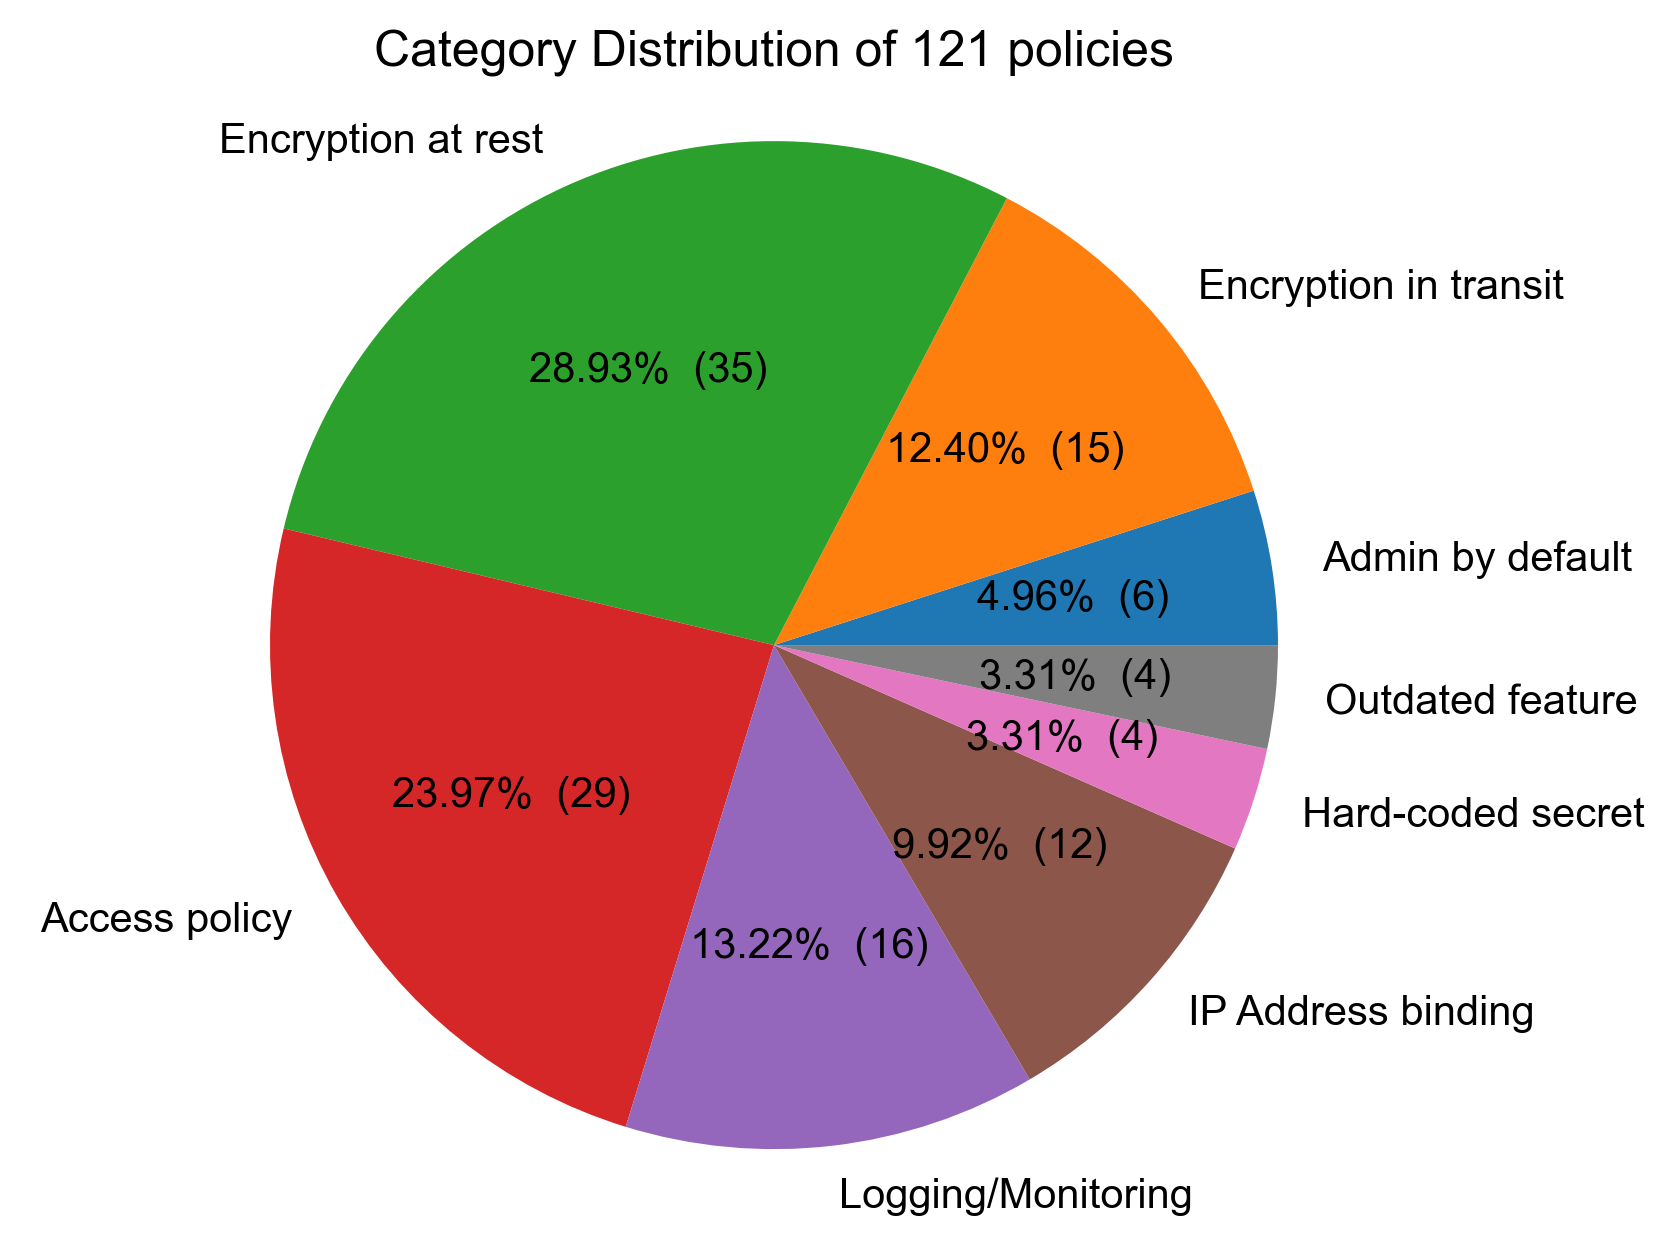

In [7]:
labels2 = [*categories_count.keys()]
sizes2 = [*categories_count.values()]
fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(sizes2)/100))
ax2.axis('equal')
ax2.set(title="Category Distribution of {} policies".format(len(policies)))
plt.show()

In [8]:
resource_count = {}
for policy in policies:
    if categories.get(policy, "Uncategorized") == "IP Address binding":
        resource = "_".join(p_names[policy].split("_")[:3])
        resource_count[resource] = resource_count.get(resource, 0) + 1

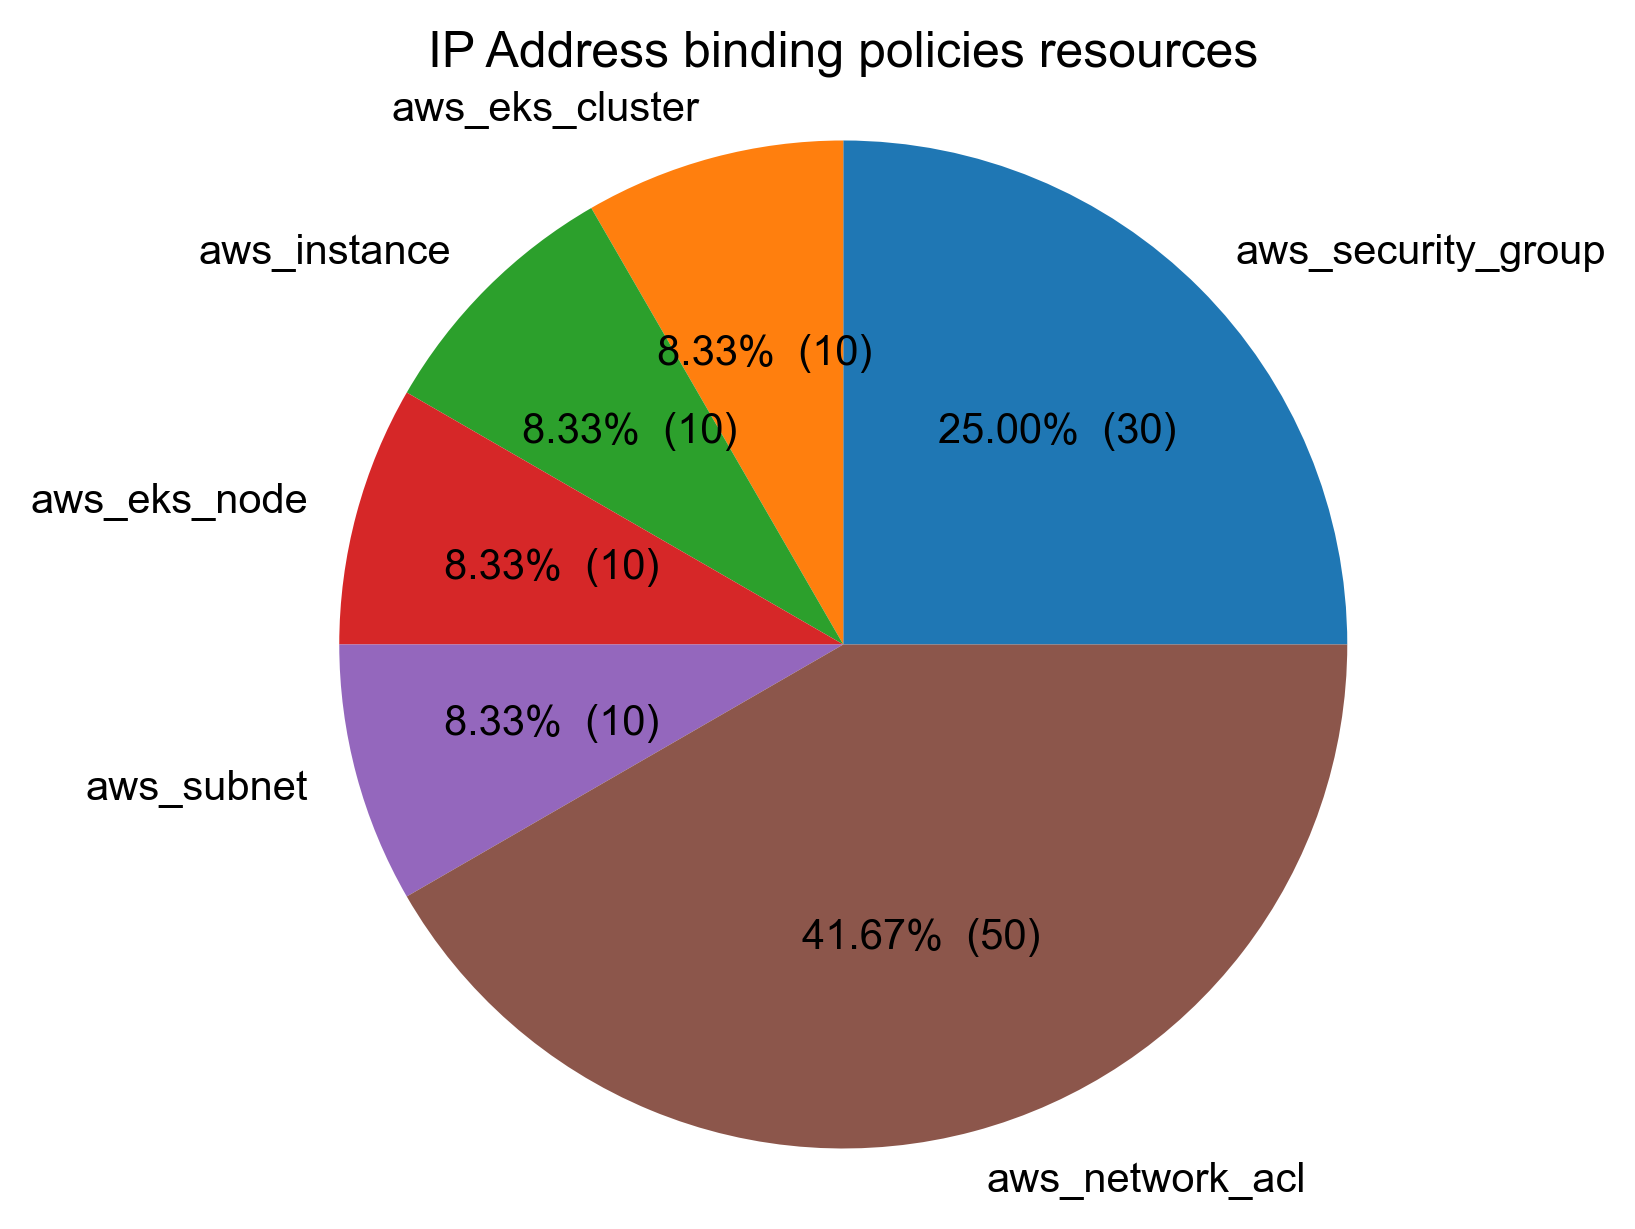

In [9]:
labels3 = [*resource_count.keys()]
sizes3 = [*resource_count.values()]
fig3, ax3 = plt.subplots()
ax3.pie(sizes3, labels=labels3, autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(sizes2)/100))
ax3.axis('equal')
ax3.set(title='IP Address binding policies resources')
plt.show()

[5, 3, 1, 1, 1, 1]


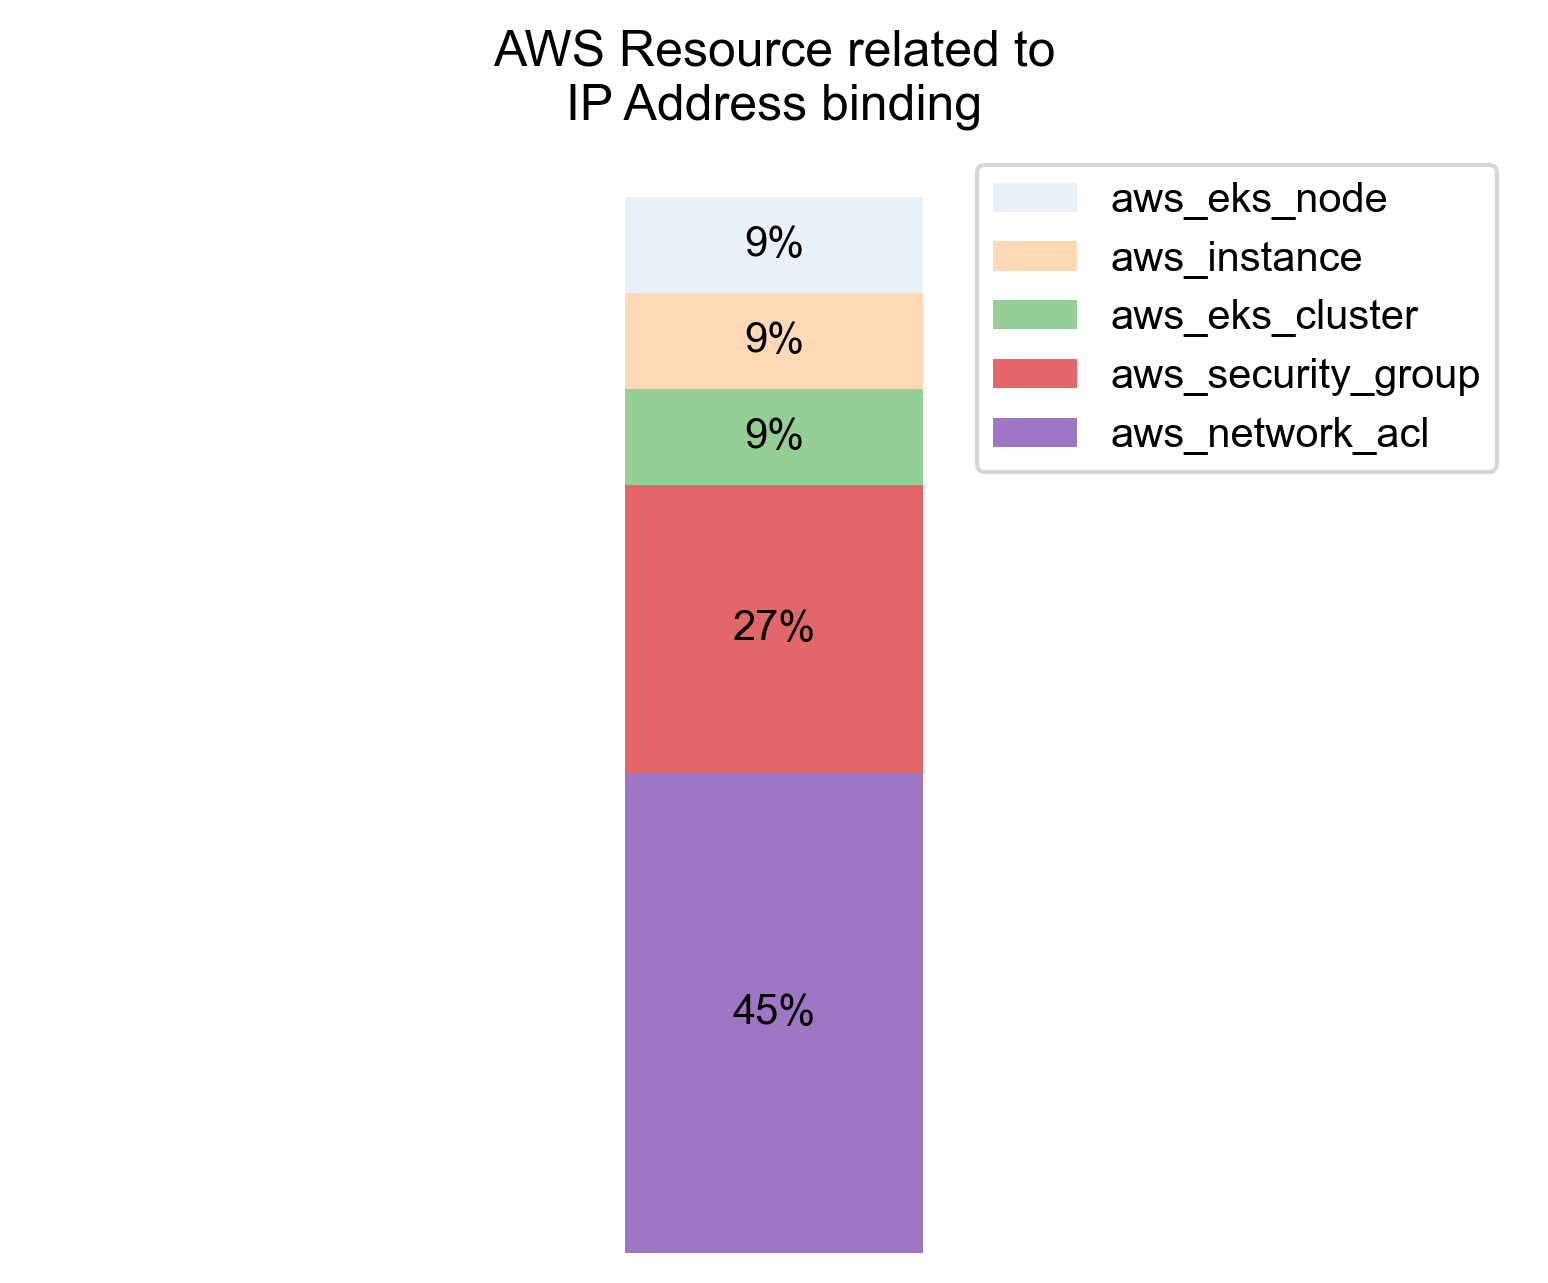

In [10]:
# bar chart parameters
sorted_resources = sorted(resource_count, key=resource_count.get, reverse=True)
croped_sorted_resources = sorted_resources[:5]
others_sum = 0
for resource in sorted_resources[5:]:
    others_sum += resource_count.get(resource, 0)
sizes4 = [resource_count.get(resource, 0) for resource in croped_sorted_resources]
normalized_sizes4 = [float(i)/sum(sizes4) for i in sizes4]
labels4 = croped_sorted_resources
if others_sum > 0:
    sizes4 = sizes4 + [others_sum]
    labels4 = labels4 + ["Others"]
print(sizes4)
bottom = 1
width = .2

fig4, ax4 = plt.subplots()
# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(normalized_sizes4, labels4)])):
    bottom -= height
    bc = ax4.bar(0, height, width, bottom=bottom, label=label,
                 alpha=min(1,0.1 + 1/len(normalized_sizes4) * j))
    ax4.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax4.set_title('AWS Resource related to\nIP Address binding')
ax4.legend()
ax4.axis('off')
ax4.set_xlim(- 2.5 * width, 2.5 * width)
plt.show()

## Results analysis

In [11]:
with open(STAR_FILTERED_REPOS, 'r') as f:
    tmp_repo_names = f.readlines()
repo_names = [k.strip("\n") for k in tmp_repo_names]

In [12]:
with open(INPUT_FILE, 'r') as f:
    f.readline()
    repo_results = f.readlines()

In [13]:
passed_count_dict = {}
failed_count_dict = {}
categories_passed_counts = {}
categories_failed_counts = {}
uncategorized_policies = {}
repo_results_list = []
for row in repo_results:
    columns = row.split(',')
    repo_name = columns[0]
    if repo_name in repo_names:
        passed_policies = columns[3].split(';')
        failed_policies = columns[4].split(';')
        repo_results_list.append([len(passed_policies), len(failed_policies)])

        for policy in passed_policies:
            if len(policy) > 0:
                if categories.get(policy, "Uncategorized") == "Uncategorized":
                    uncategorized_policies[policy] = True
                    continue
                categories_passed_counts[categories.get(policy, "Uncategorized")] = categories_passed_counts.get(categories.get(policy, "Uncategorized"), 0) + 1
                passed_count_dict[policy] = passed_count_dict.get(policy, 0) + 1
                
        for policy in failed_policies:
            if len(policy) > 0:
                if categories.get(policy, "Uncategorized") == "Uncategorized":
                    uncategorized_policies[policy] = True
                    continue
                categories_failed_counts[categories.get(policy, "Uncategorized")] = categories_failed_counts.get(categories.get(policy, "Uncategorized"), 0) + 1
                failed_count_dict[policy] = failed_count_dict.get(policy, 0) + 1
                

total_count = {}
for policy in passed_count_dict:
    total_count[policy] = total_count.get(policy, 0) + passed_count_dict[policy]
for policy in failed_count_dict:
    total_count[policy] = total_count.get(policy, 0) + failed_count_dict[policy]
                    
print("Uncategorized policies: {}".format([*uncategorized_policies.keys()]))
print("Total number of passed policies: {}".format(sum(passed_count_dict.values())))
print("Total number of failed policies: {}".format(sum(failed_count_dict.values())))
print("Median number of checks per policy: {}".format(np.median([*total_count.values()])))
print("Average number of checks per policy: {}".format(np.average([*total_count.values()])))

Uncategorized policies: []
Total number of passed policies: 45171
Total number of failed policies: 13874
Median number of checks per policy: 174.0
Average number of checks per policy: 504.65811965811963


In [14]:
nb_of_checks = []
for i in repo_results_list:
    nb_of_checks.append(i[0]+i[1])
rate_list = []
for i in repo_results_list:
    rate_list.append(100*i[0]/(i[0]+i[1]))
    
print("Median number of checks per repo: {}".format(np.median(nb_of_checks)))
print("Average number of checks per repo: {}".format(np.average(nb_of_checks)))

print("Median pass rate per repo: {}".format(np.median(rate_list)))
print("Average pass rate per repo: {}".format(np.average(rate_list)))

Median number of checks per repo: 56.0
Average number of checks per repo: 160.01355013550136
Median pass rate per repo: 71.42857142857143
Average pass rate per repo: 69.11965064827196


In [15]:
inv_cat = {}
for k, v in categories.items():
    inv_cat[v] = inv_cat.get(v, []) + [k]
tp = ""
for cat in inv_cat:
    p = inv_cat[cat]
    tp = tp + "\multirow{" + str(len(p)) + "}{*}{" + cat + "}"
    for i in p:
        if total_count.get(i,0) != 0:
            tp = tp + " & " + policies[i] + " & " + str(total_count.get(i,0)) + " & " + str(passed_count_dict.get(i,0)) + " & " + str(failed_count_dict.get(i,0)) + " & " + str(passed_count_dict.get(i,0)/total_count.get(i,0)*100)[:5] +"\\\\ \n"
        else:
            tp = tp + " & " + policies[i] + " & " + str(total_count.get(i,0)) + " & " + str(passed_count_dict.get(i,0)) + " & " + str(failed_count_dict.get(i,0)) + " & " +"\\\\ \n"
    tp = tp + "\hline \n"
tp = tp.replace("_", "\_")
print(tp)

\multirow{6}{*}{Admin by default} & "Ensure IAM policies that allow full ""-"" administrative privileges are not created" & 2172 & 2163 & 9 & 99.58\\ 
 & Ensure KMS key policy does not contain wildcard (*) principal & 243 & 239 & 4 & 98.35\\ 
 & "Ensure no IAM policies documents allow ""*"" as a statement's actions" & 2172 & 2158 & 14 & 99.35\\ 
 & "Ensure IAM policies that allow full ""-"" administrative privileges are not created" & 2639 & 2597 & 42 & 98.40\\ 
 & "Ensure no IAM policies documents allow ""*"" as a statement's actions" & 2640 & 2596 & 44 & 98.33\\ 
 & Ensure SQS policy does not allow ALL (*) actions. & 48 & 48 & 0 & 100.0\\ 
\hline 
\multirow{15}{*}{Encryption in transit} & Ensure ALB protocol is HTTPS & 359 & 223 & 136 & 62.11\\ 
 & Ensure all Elasticsearch has node-to-node encryption enabled & 38 & 30 & 8 & 78.94\\ 
 & Ensure all data stored in the Elasticache Replication Group is securely encrypted at transit & 39 & 13 & 26 & 33.33\\ 
 & Ensure all data stored in th

50


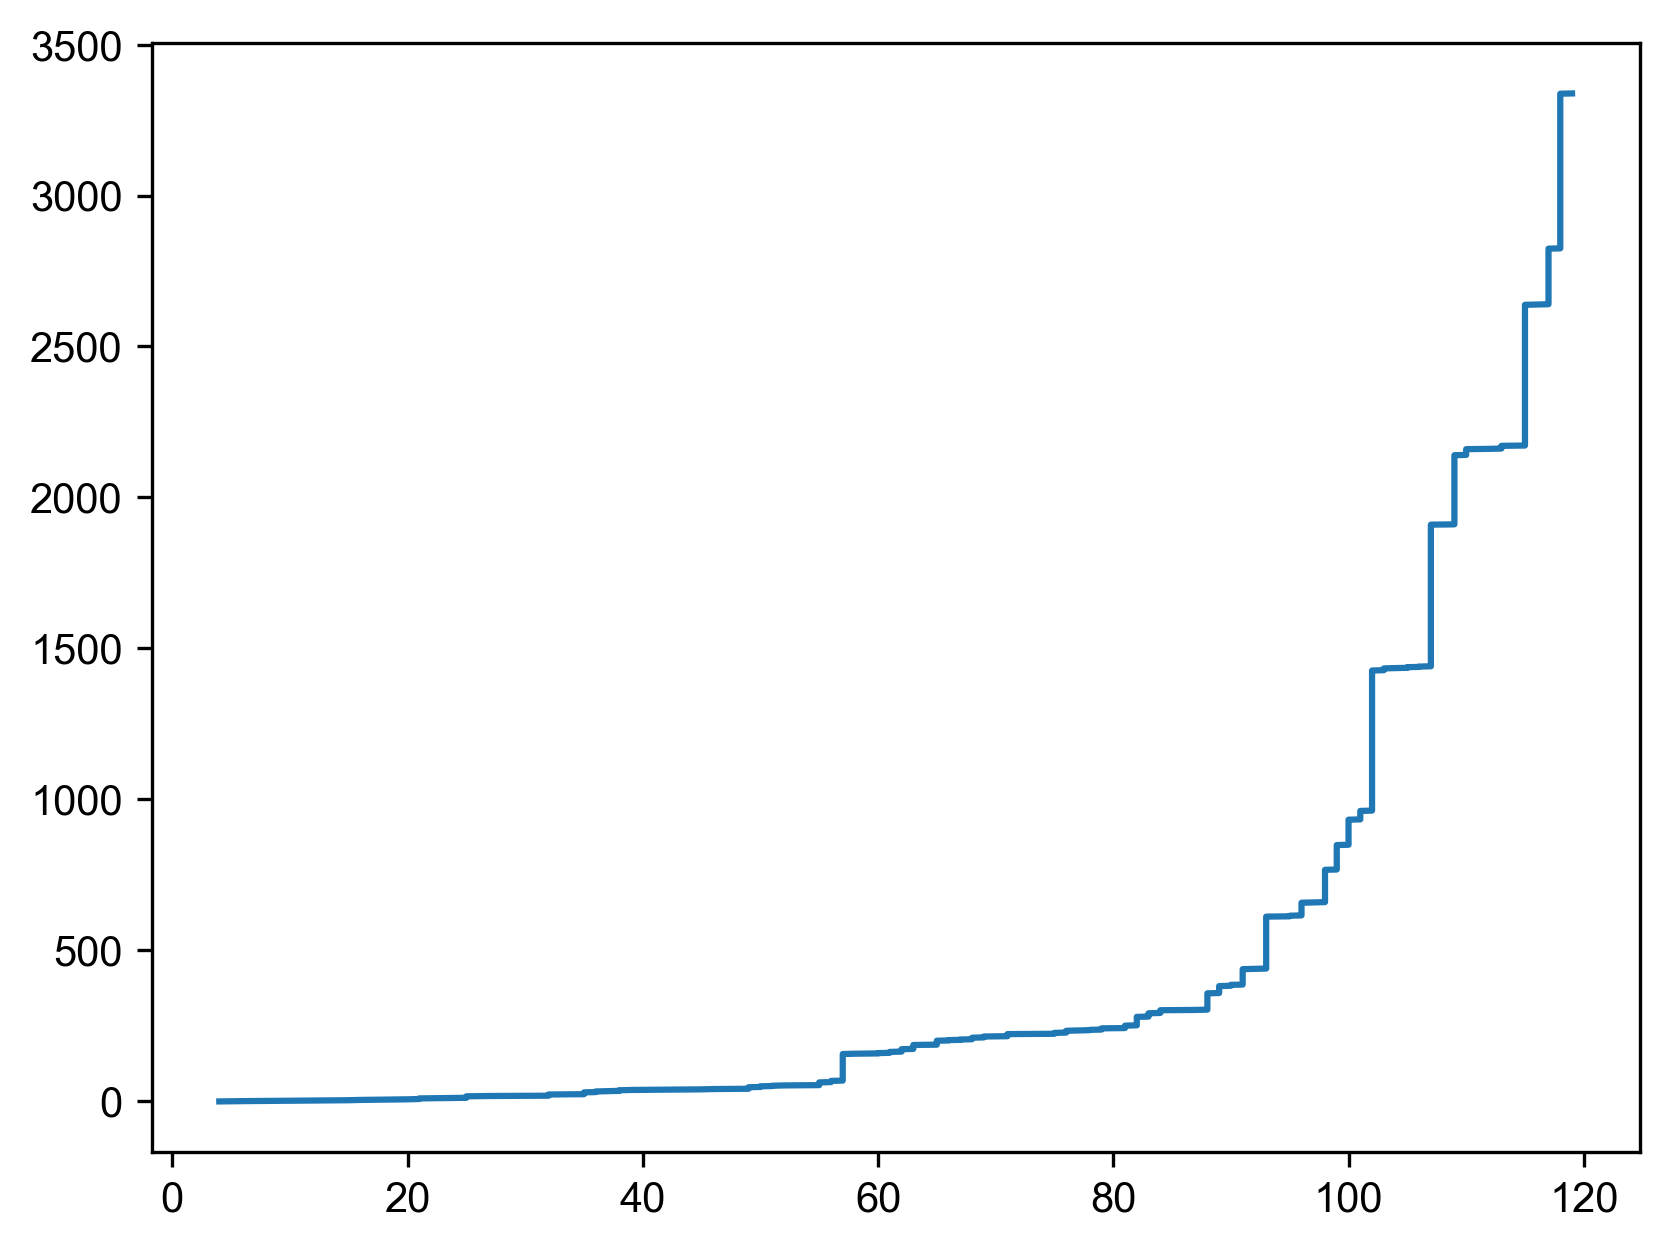

In [16]:
total_count_values = [*total_count.values()]
max_checks = max(total_count_values)
c = 4
buff = []
for nb_check in range(max_checks):
    c += total_count_values.count(nb_check)
    buff.append(c)
print(buff[50])
plt.clf()
plt.plot(buff, range(max_checks))
plt.show()

{'Logging/Monitoring': 3476, 'Encryption at rest': 3390, 'Outdated feature': 1125, 'Access policy': 3577, 'IP Address binding': 1503, 'Encryption in transit': 633, 'Hard-coded secret': 57, 'Admin by default': 113}


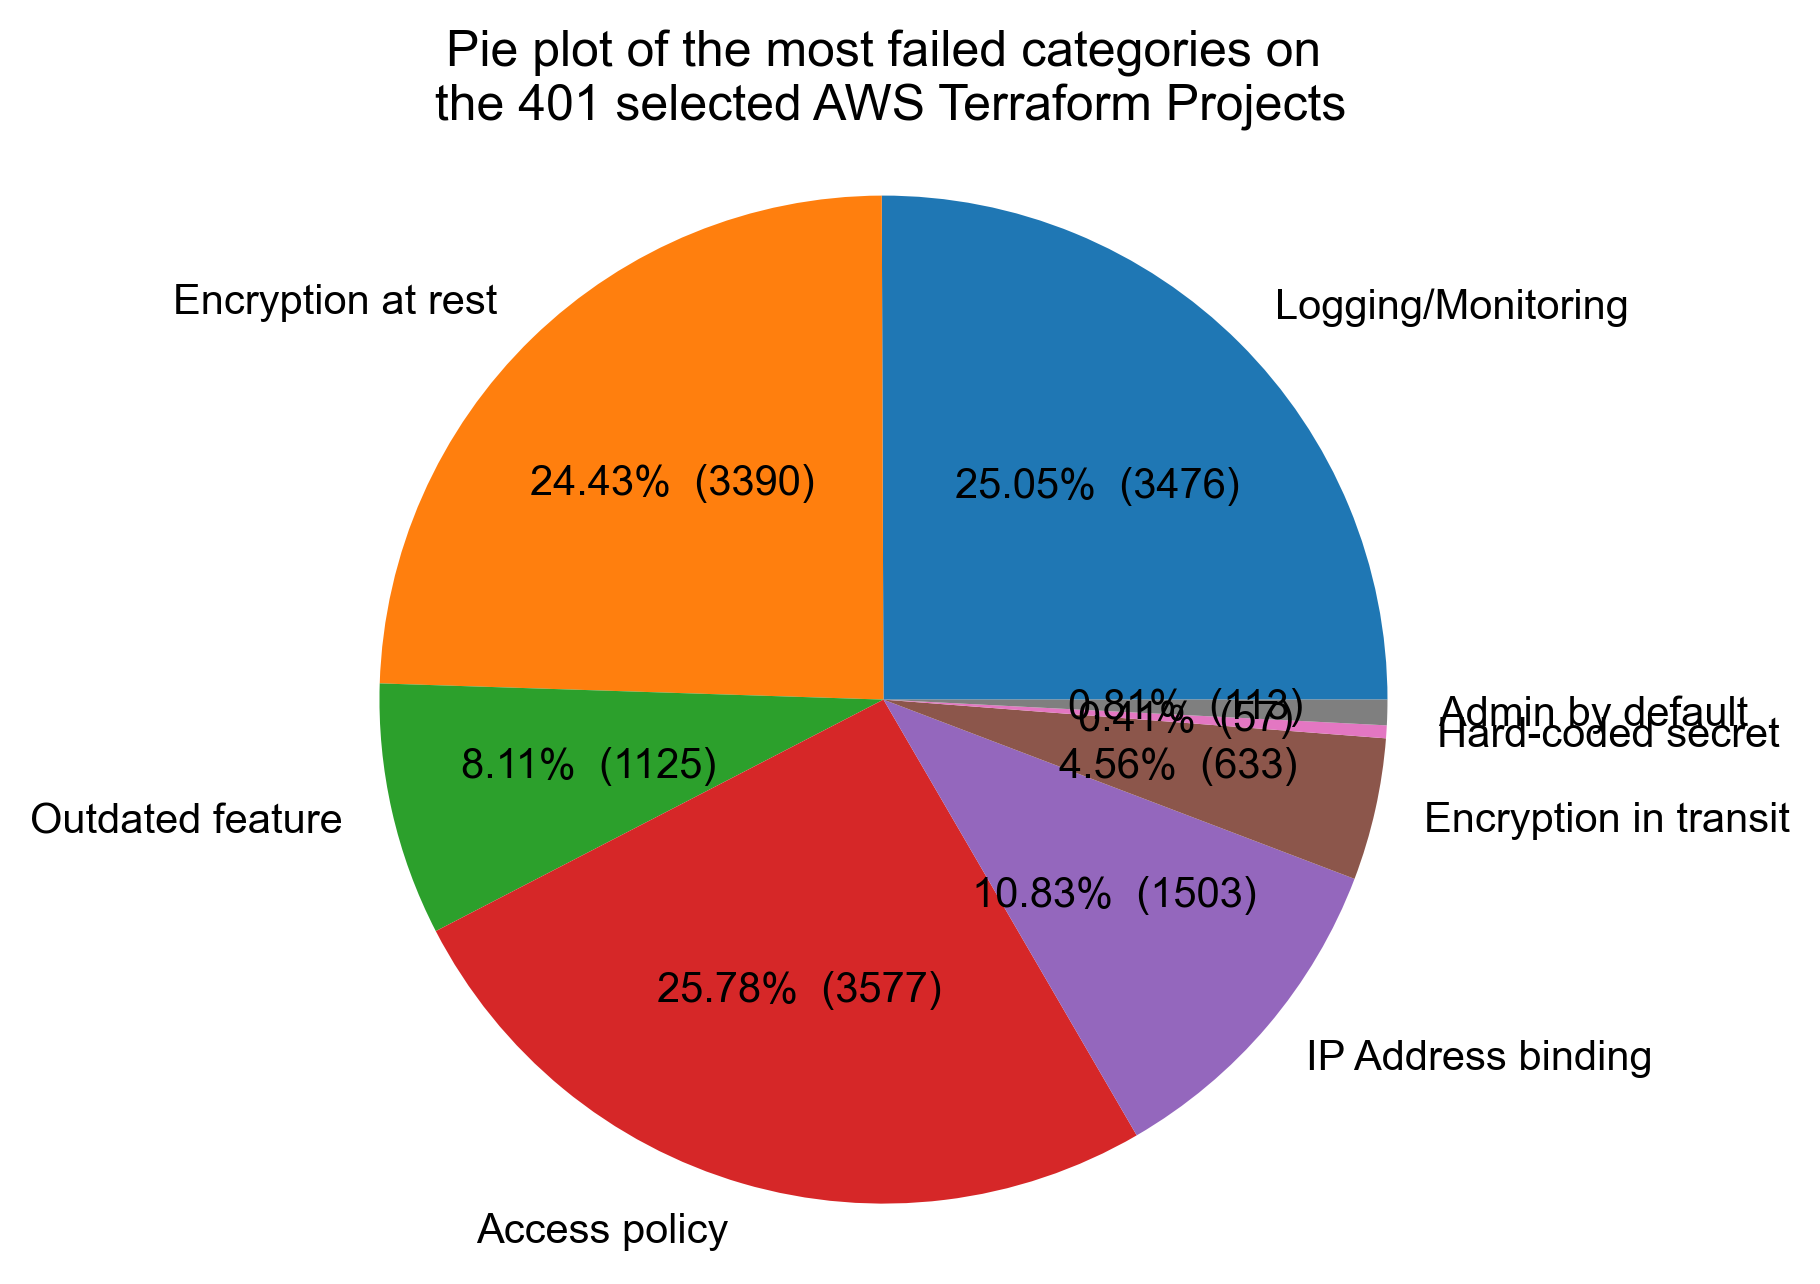

In [17]:
labels = [*categories_failed_counts.keys()]
sizes = [*categories_failed_counts.values()]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda p : '{:.2f}%  ({:.0f})'.format(p,p * sum(sizes)/100))
ax1.axis('equal')
ax1.set(title='Pie plot of the most failed categories on\n the {} selected AWS Terraform Projects'.format(len(repo_names)))
print(categories_failed_counts)
plt.show()

{'Hard-coded secret': 4086, 'IP Address binding': 11263, 'Logging/Monitoring': 631, 'Access policy': 16993, 'Encryption at rest': 1185, 'Encryption in transit': 1083, 'Outdated feature': 129, 'Admin by default': 9801}


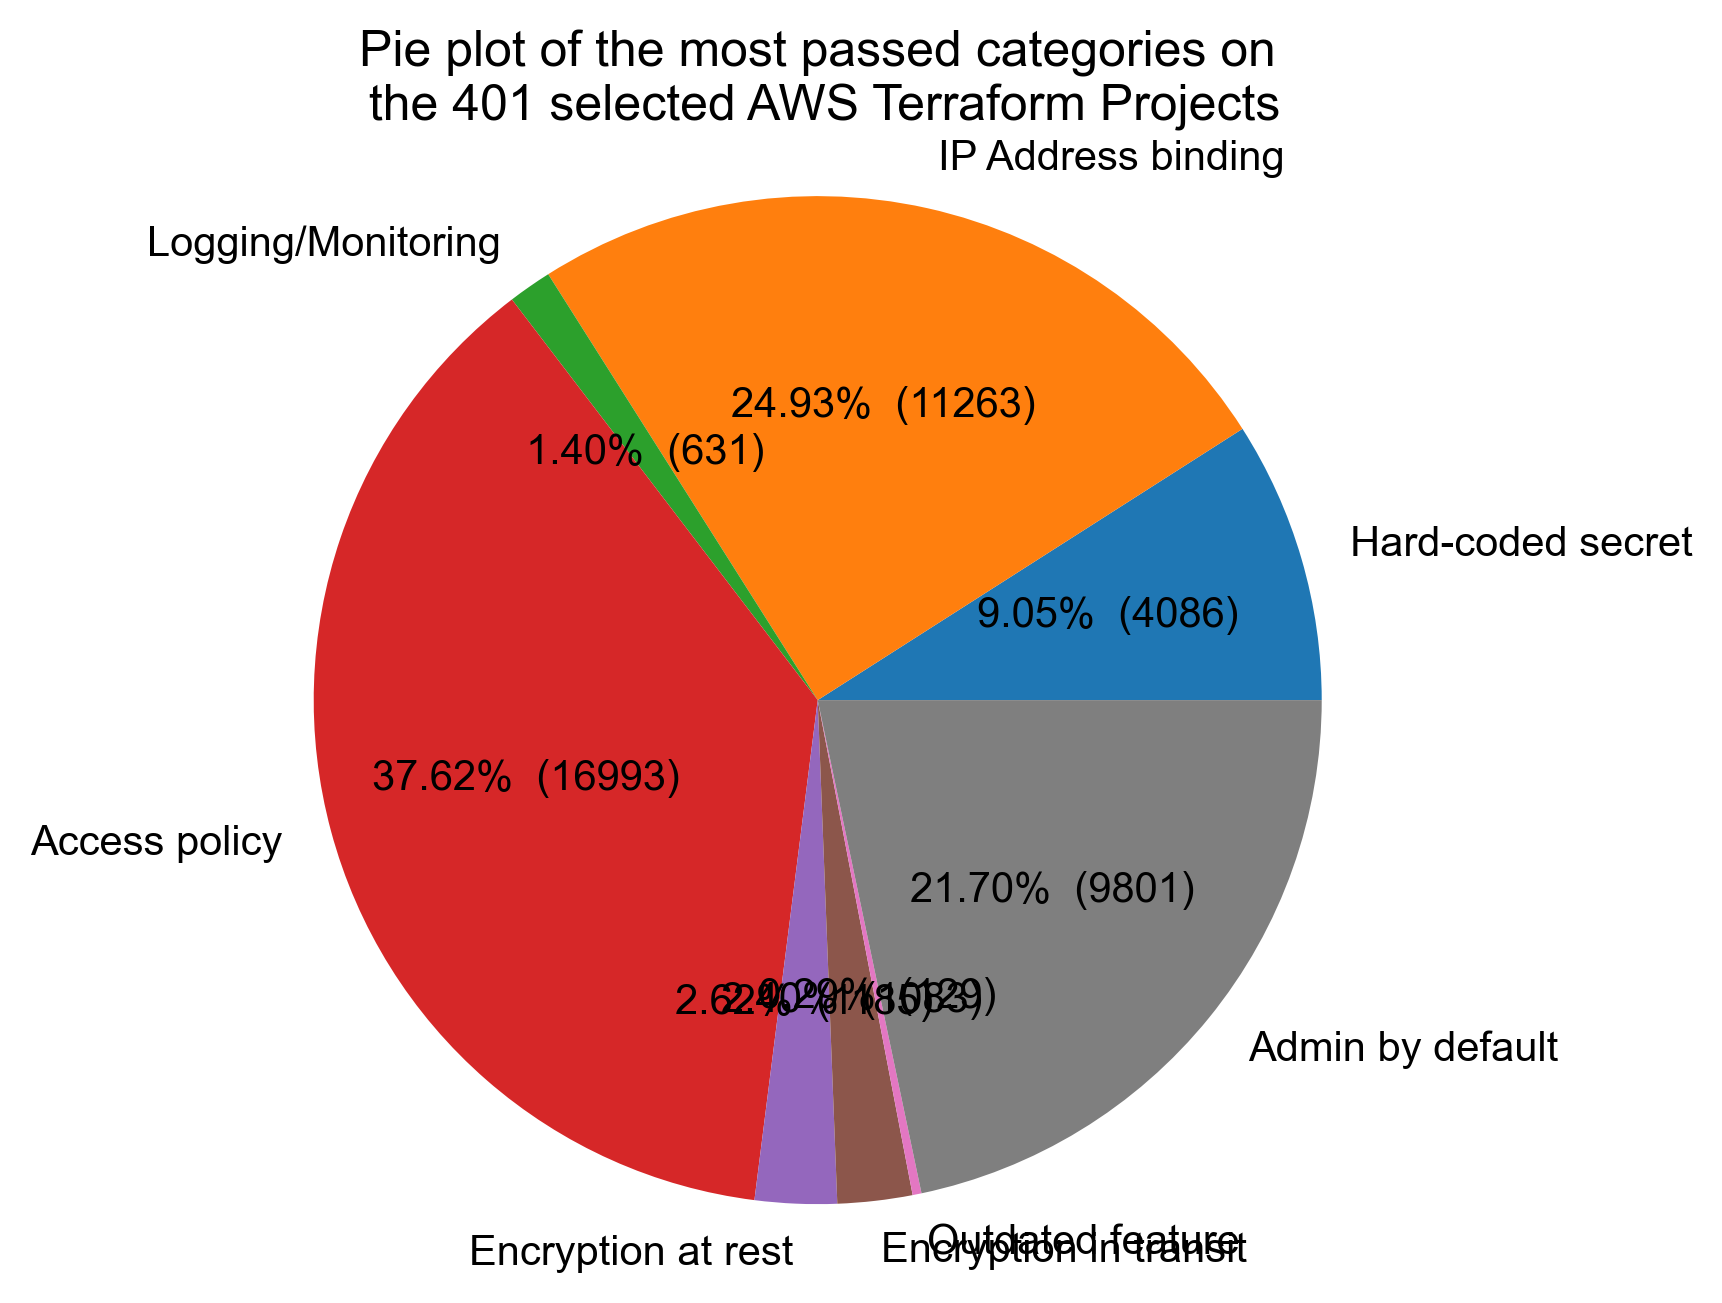

In [18]:
labels5 = [*categories_passed_counts.keys()]
sizes5 = [*categories_passed_counts.values()]
fig5, ax5 = plt.subplots()
ax5.pie(sizes5, labels=labels5, autopct=lambda p : '{:.2f}%  ({:.0f})'.format(p,p * sum(sizes5)/100))
ax5.axis('equal')
ax5.set(title='Pie plot of the most passed categories on\n the {} selected AWS Terraform Projects'.format(len(repo_names)))
print(categories_passed_counts)
plt.show()

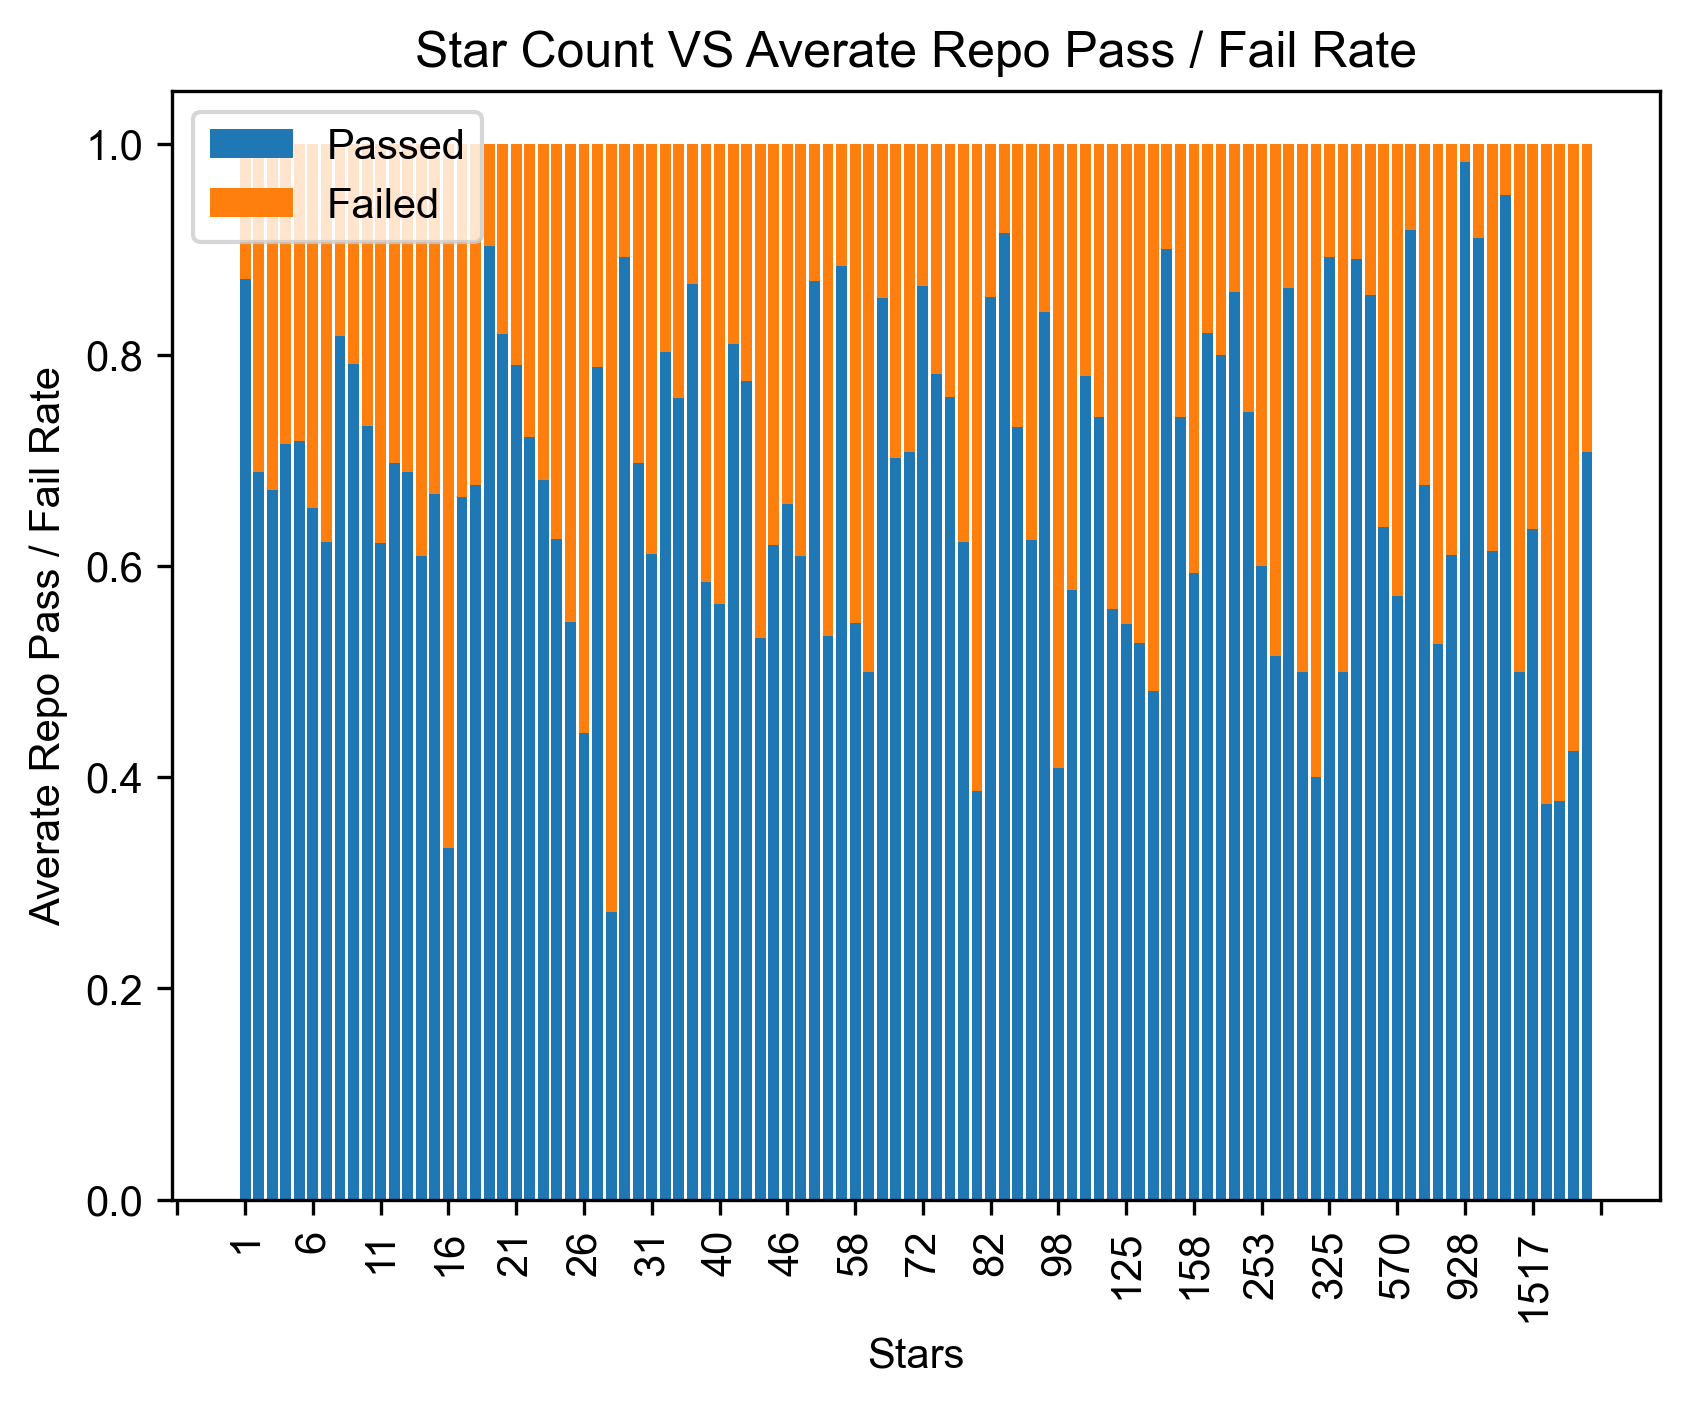

In [19]:
repo_stars = {}
with open(METRICS_FILE, 'r') as f:
    f.readline()
    rows = f.readlines()
    for item in rows:
        column = item.split(',')
        if column[0] in repo_names:
            repo_stars[column[1]] = repo_stars.get(column[1], []) + [column[0]]

stars_passed_rate = {}
for star_count in repo_stars:
    repo_list = repo_stars.get(star_count, [])
    rates = []
    for row in repo_results:
        columns = row.split(',')
        repo_name = columns[0]
        if repo_name in repo_list:
            passed_count = len(columns[3].split(';'))
            failed_count = len(columns[4].split(';'))
            if passed_count + failed_count > 0:
                rates.append(passed_count/(passed_count+failed_count))
    if len(rates) > 0:
        stars_passed_rate[star_count] = np.average(rates)
        

fig6, ax6 = plt.subplots()
        
x = sorted([int(k) for k in [*stars_passed_rate.keys()]], reverse=False)
xstr = [str(k) for k in x]
y1 = [1*stars_passed_rate[str(k)] for k in x]
y2 = [1-k for k in y1]
ax6.bar(xstr, y1)
ax6.bar(xstr, y2, bottom=y1)
ax6.set(xlabel="Stars", ylabel="Averate Repo Pass / Fail Rate", title="Star Count VS Averate Repo Pass / Fail Rate")
ax6.legend(["Passed", "Failed"])
ax6.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(rotation=90)
plt.show()

In [20]:
data = np.array([int(k) for k in [*repo_stars.keys()]])
bins = [2, 3, 5, 10, 20, 50, 100, 300, 800, 1500, 10000]
digitized = np.digitize(data, bins)
print(digitized)

[10 10 10 10 10 10  9  9  9  9  9  9  9  9  9  8  8  8  8  8  8  8  8  8
  8  8  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  4  4  4  4  4  4
  4  4  4  4  3  3  3  3  3  2  2  1  0]


{0: 0.6886147036356698, 1: 0.6724124544574558, 2: 0.7181850262339173, 3: 0.7327388491253732, 4: 0.8197384806973849, 5: 0.8695652173913043, 6: 0.78, 7: 0.8929889298892989, 8: 0.9826388888888888, 9: 0.6351351351351351}


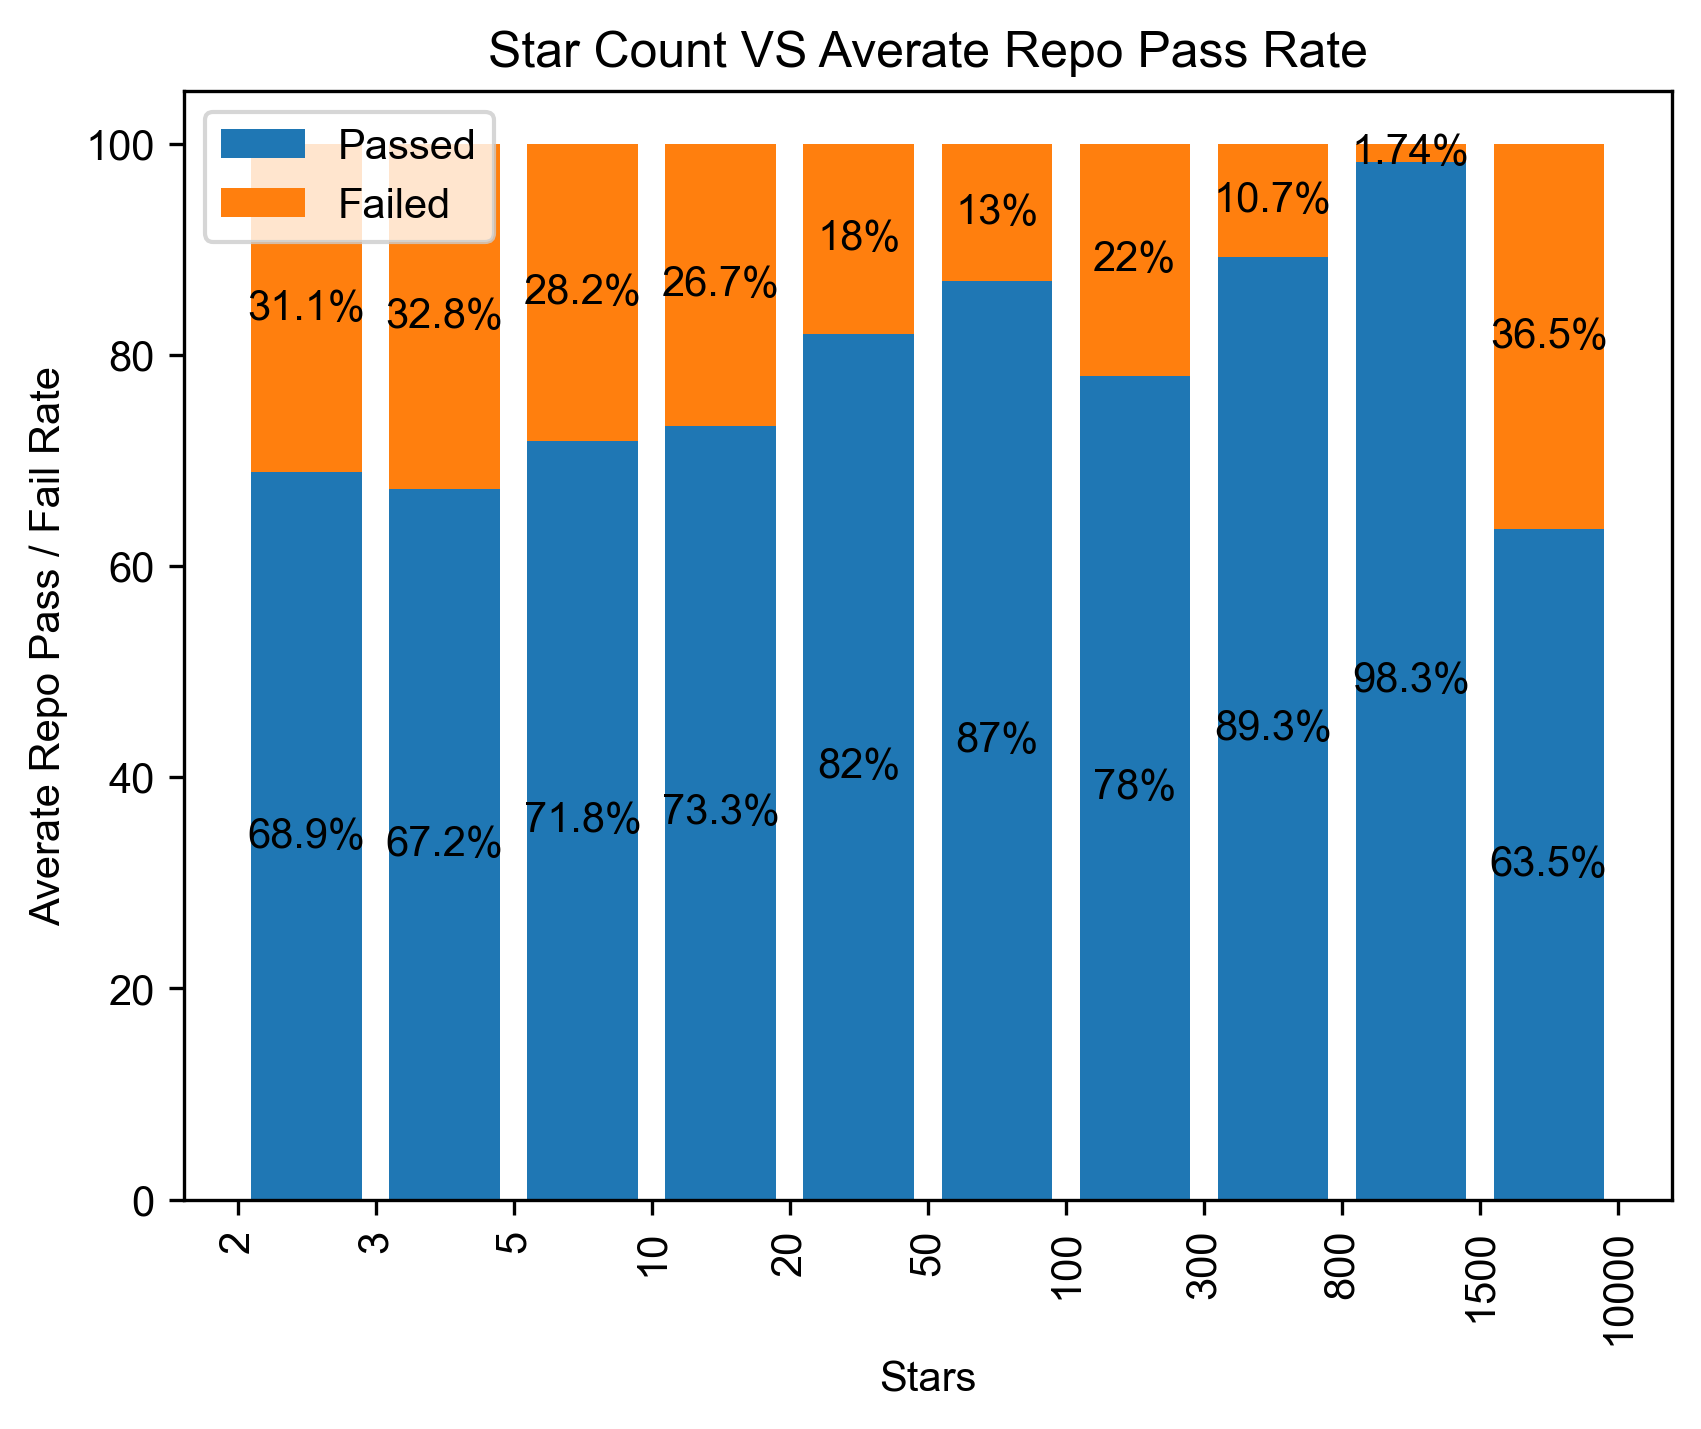

In [21]:
stars_passed_rate = {}
for i in range(len(bins)-1):
    low = bins[i]
    high = bins[i+1]
    for star_count in repo_stars:
        if int(star_count) < low or int(star_count) >= high:
            continue
        repo_list = repo_stars.get(star_count, [])
        rates = []
        for row in repo_results:
            columns = row.split(',')
            repo_name = columns[0]
            if repo_name in repo_list:
                passed_count = len(columns[3].split(';'))
                failed_count = len(columns[4].split(';'))
                if passed_count + failed_count > 0:
                    rates.append(passed_count/(passed_count+failed_count))
        if len(rates) > 0:
            stars_passed_rate[i] = np.average(rates)
print(stars_passed_rate)

fig6, ax6 = plt.subplots()
        
x = [*stars_passed_rate.keys()]
y1 = [100*stars_passed_rate[k] for k in x]
y2 = [100-k for k in y1]
bc1 = ax6.bar(x, y1)
bc2 = ax6.bar(x, y2, bottom=y1)
ax6.bar_label(bc1, labels=['{0:.3g}%'.format(e) for e in y1], label_type='center')
ax6.bar_label(bc2, labels=['{0:.3g}%'.format(e) for e in y2], label_type='center')
ax6.set(xlabel="Stars", ylabel="Averate Repo Pass / Fail Rate", title="Star Count VS Averate Repo Pass Rate")
ax6.legend(["Passed", "Failed"])
ax6.set_xticks(np.arange(-0.5,len(bins)-0.5), bins)
#ax6.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(rotation=90)
plt.show()

coefficient of determination: 0.6920465952411914
intercept: 0.7445809650592581
coefficients: [0.00022347]
[0.74513964 0.74547484 0.74625698 0.747933   0.75240239 0.76134116
 0.78927482 0.86748907 1.00157064]
Spearman correlation: 0.9333333333333332
P-value: 0.00023589981215941676
Shapiro test: 0.000537971849553287
coefficient of determination: 0.7256804415968215
intercept: 0.7340940606823808
coefficients: [ 4.11368470e-04 -1.72678111e-07]
[0.7351214  0.73573677 0.73716961 0.74022574 0.74828043 0.76397538
 0.80946063 0.90811159 0.978801  ]


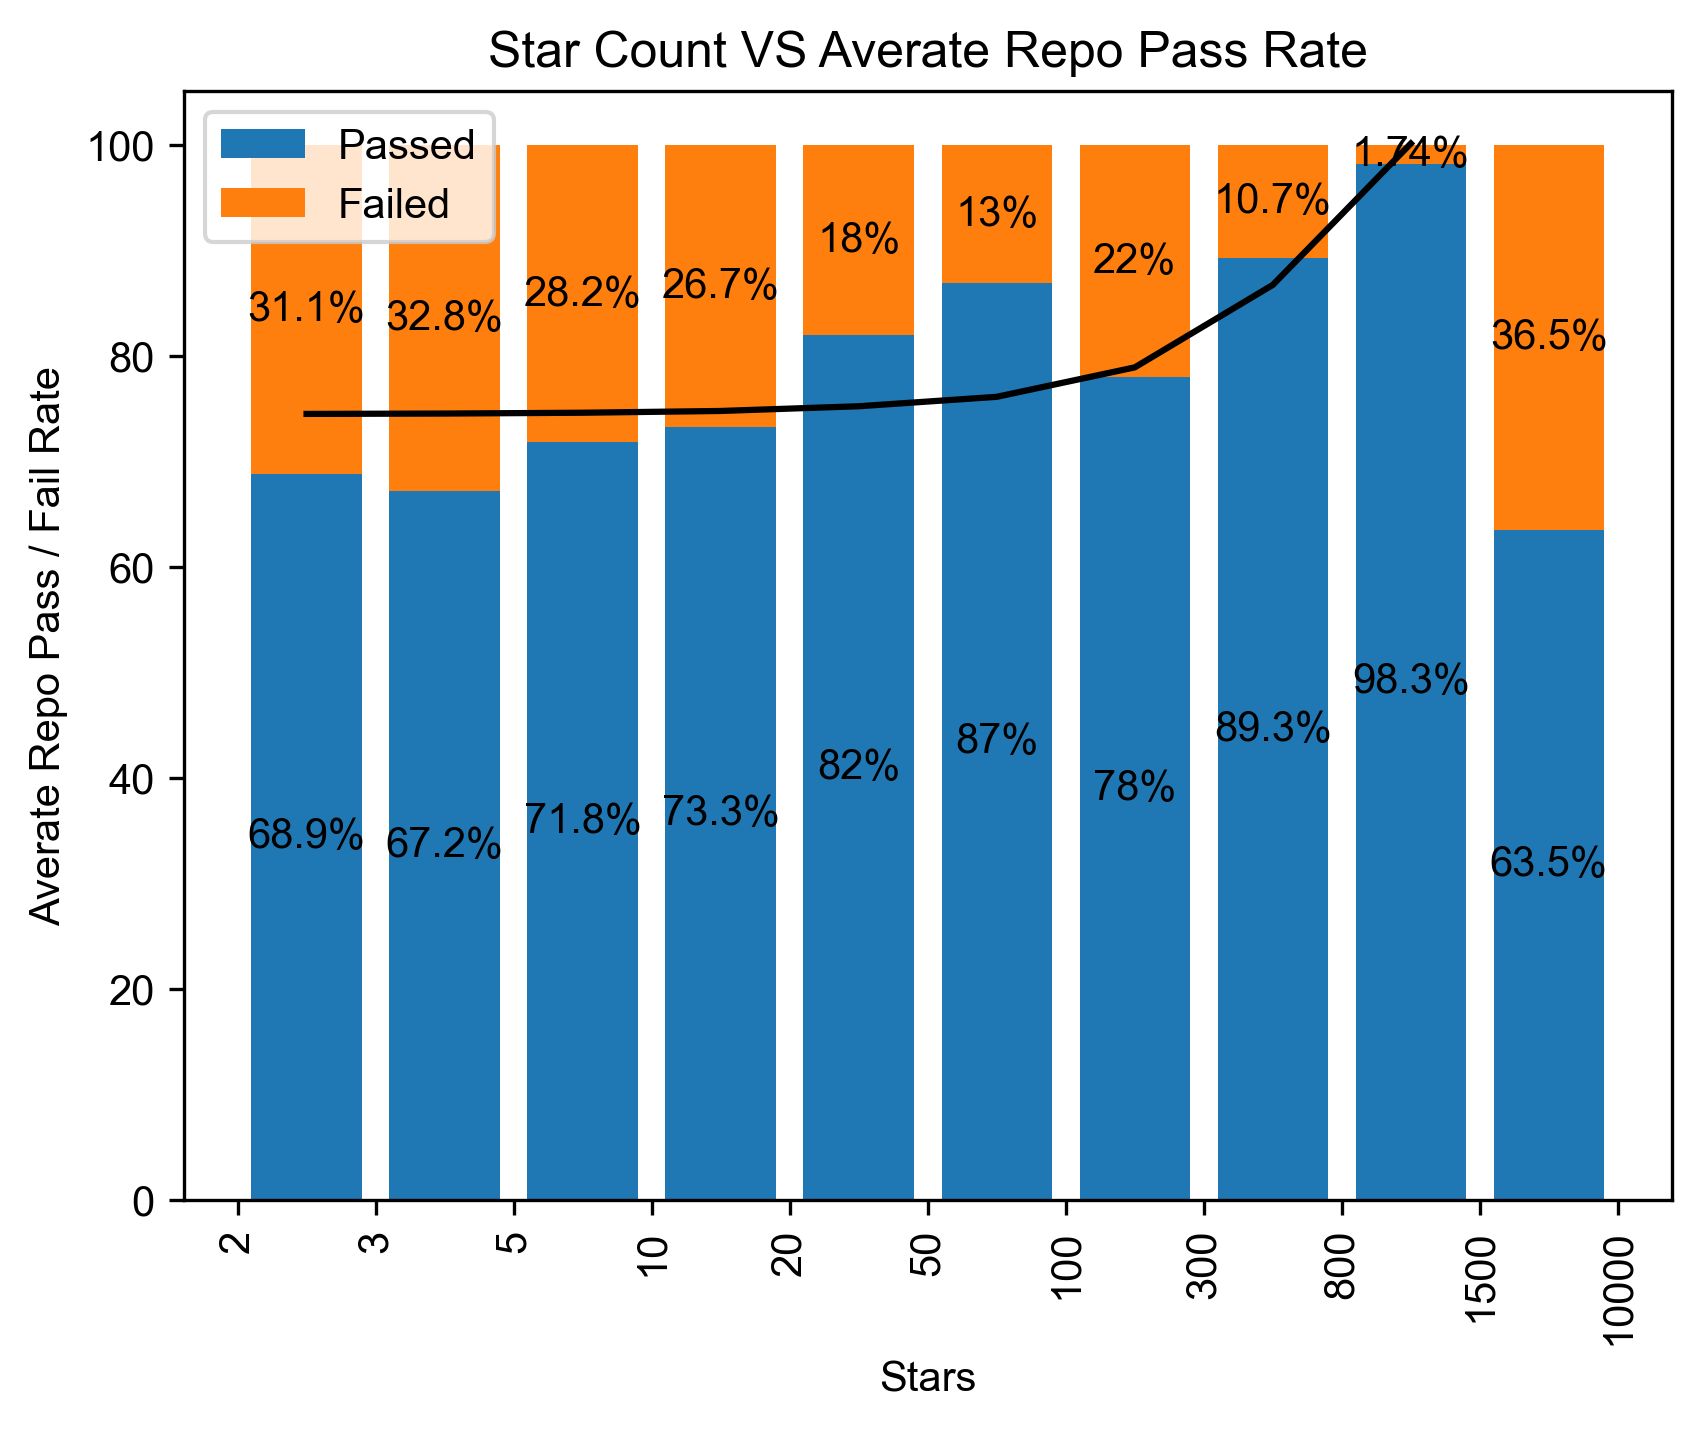

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

ycor = np.array([*stars_passed_rate.values()][:-1])
xcor = np.array([(bins[i+1]+bins[i])/2 for i in range(0, len(bins)-1)][:-1]).reshape((-1,1))

model = LinearRegression().fit(xcor, ycor)
r_sq = model.score(xcor, ycor)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
ypred = model.predict(xcor)
print(ypred)

from scipy.stats import spearmanr, shapiro, pearsonr
correlation, p_value = spearmanr(ycor, xcor)
#correlation, p_value = pearsonr(ycor, xcor)

print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")
res = shapiro(xcor)
print(f"Shapiro test: {res.pvalue}")


transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(xcor)
x_ = transformer.transform(xcor)
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xcor)
model = LinearRegression().fit(x_, ycor)
r_sq = model.score(x_, ycor)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
ypred_2 = model.predict(x_)
print(ypred_2)

fig7, ax7 = plt.subplots()
x = [*stars_passed_rate.keys()]
y1 = [100*stars_passed_rate[k] for k in x]
y2 = [100-k for k in y1]
bc1 = ax7.bar(x, y1)
bc2 = ax7.bar(x, y2, bottom=y1)
ax7.bar_label(bc1, labels=['{0:.3g}%'.format(e) for e in y1], label_type='center')
ax7.bar_label(bc2, labels=['{0:.3g}%'.format(e) for e in y2], label_type='center')
ax7.set(xlabel="Stars", ylabel="Averate Repo Pass / Fail Rate", title="Star Count VS Averate Repo Pass Rate")
ax7.legend(["Passed", "Failed"])
ax7.set_xticks(np.arange(-0.5,len(bins)-0.5), bins)
#ax6.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(rotation=90)
ax7.plot(x[:-1], ypred*100, color='black', label='Linear Regression')
#ax7.plot(x[:-1], ypred_2*100, color='grey', label='Polynomial Regression')
plt.show()

In [23]:
stars = []
with open(METRICS_FILE, 'r') as f:
    f.readline()
    rows = f.readlines()
    for item in rows:
        column = item.split(',')
        if column[0] in repo_names:
            stars.append(int(column[1]))
print(stars)

[9330, 8048, 7223, 3947, 1872, 1517, 1484, 1250, 1231, 1221, 1216, 1191, 1141, 928, 946, 788, 753, 710, 572, 570, 483, 408, 392, 379, 323, 325, 284, 267, 254, 248, 248, 253, 236, 215, 210, 195, 172, 145, 158, 132, 145, 140, 126, 125, 118, 114, 106, 118, 100, 99, 98, 96, 94, 88, 85, 82, 80, 77, 77, 73, 73, 71, 75, 66, 66, 63, 60, 58, 57, 72, 56, 52, 49, 57, 49, 47, 46, 46, 45, 45, 44, 43, 43, 43, 42, 44, 38, 40, 36, 33, 34, 33, 31, 30, 30, 29, 28, 30, 28, 26, 27, 27, 27, 25, 25, 25, 24, 23, 24, 24, 23, 22, 22, 21, 21, 22, 20, 20, 19, 19, 18, 18, 18, 18, 18, 18, 17, 17, 17, 25, 18, 16, 15, 16, 15, 15, 15, 14, 14, 14, 14, 13, 14, 13, 13, 40, 12, 12, 12, 12, 12, 12, 13, 11, 11, 11, 15, 11, 11, 10, 14, 10, 10, 10, 10, 11, 10, 10, 11, 9, 12, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 8, 8, 8, 7, 8, 7, 7, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 8, 6, 22, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 

In [24]:
bin_count = [[] for k in range(len(bins)-1)]
for i in range(len(bins)-1):
    print("Bin {}".format(i+1))
    low = bins[i]
    high = bins[i+1]
    print("{} <= X < {}".format(low, high))
    for star in stars:
        if low <= star and star < high:
            bin_count[i] = bin_count[i] + [star]
    print("Count {}".format(len(bin_count[i])))
    print("Std {}".format(np.std(bin_count[i])))

Bin 1
2 <= X < 3
Count 70
Std 0.0
Bin 2
3 <= X < 5
Count 81
Std 0.49135182079339257
Bin 3
5 <= X < 10
Count 75
Std 1.3871793923882614
Bin 4
10 <= X < 20
Count 52
Std 2.832085814231553
Bin 5
20 <= X < 50
Count 48
Std 9.2584186539723
Bin 6
50 <= X < 100
Count 24
Std 13.878878336842963
Bin 7
100 <= X < 300
Count 23
Std 59.21413513361424
Bin 8
300 <= X < 800
Count 11
Std 163.59671236770214
Bin 9
800 <= X < 1500
Count 9
Std 157.33192089761485
Bin 10
1500 <= X < 10000
Count 6
Std 3038.093887986713


[70, 81, 75, 52, 48, 24, 23, 11, 9, 6]


<BarContainer object of 10 artists>

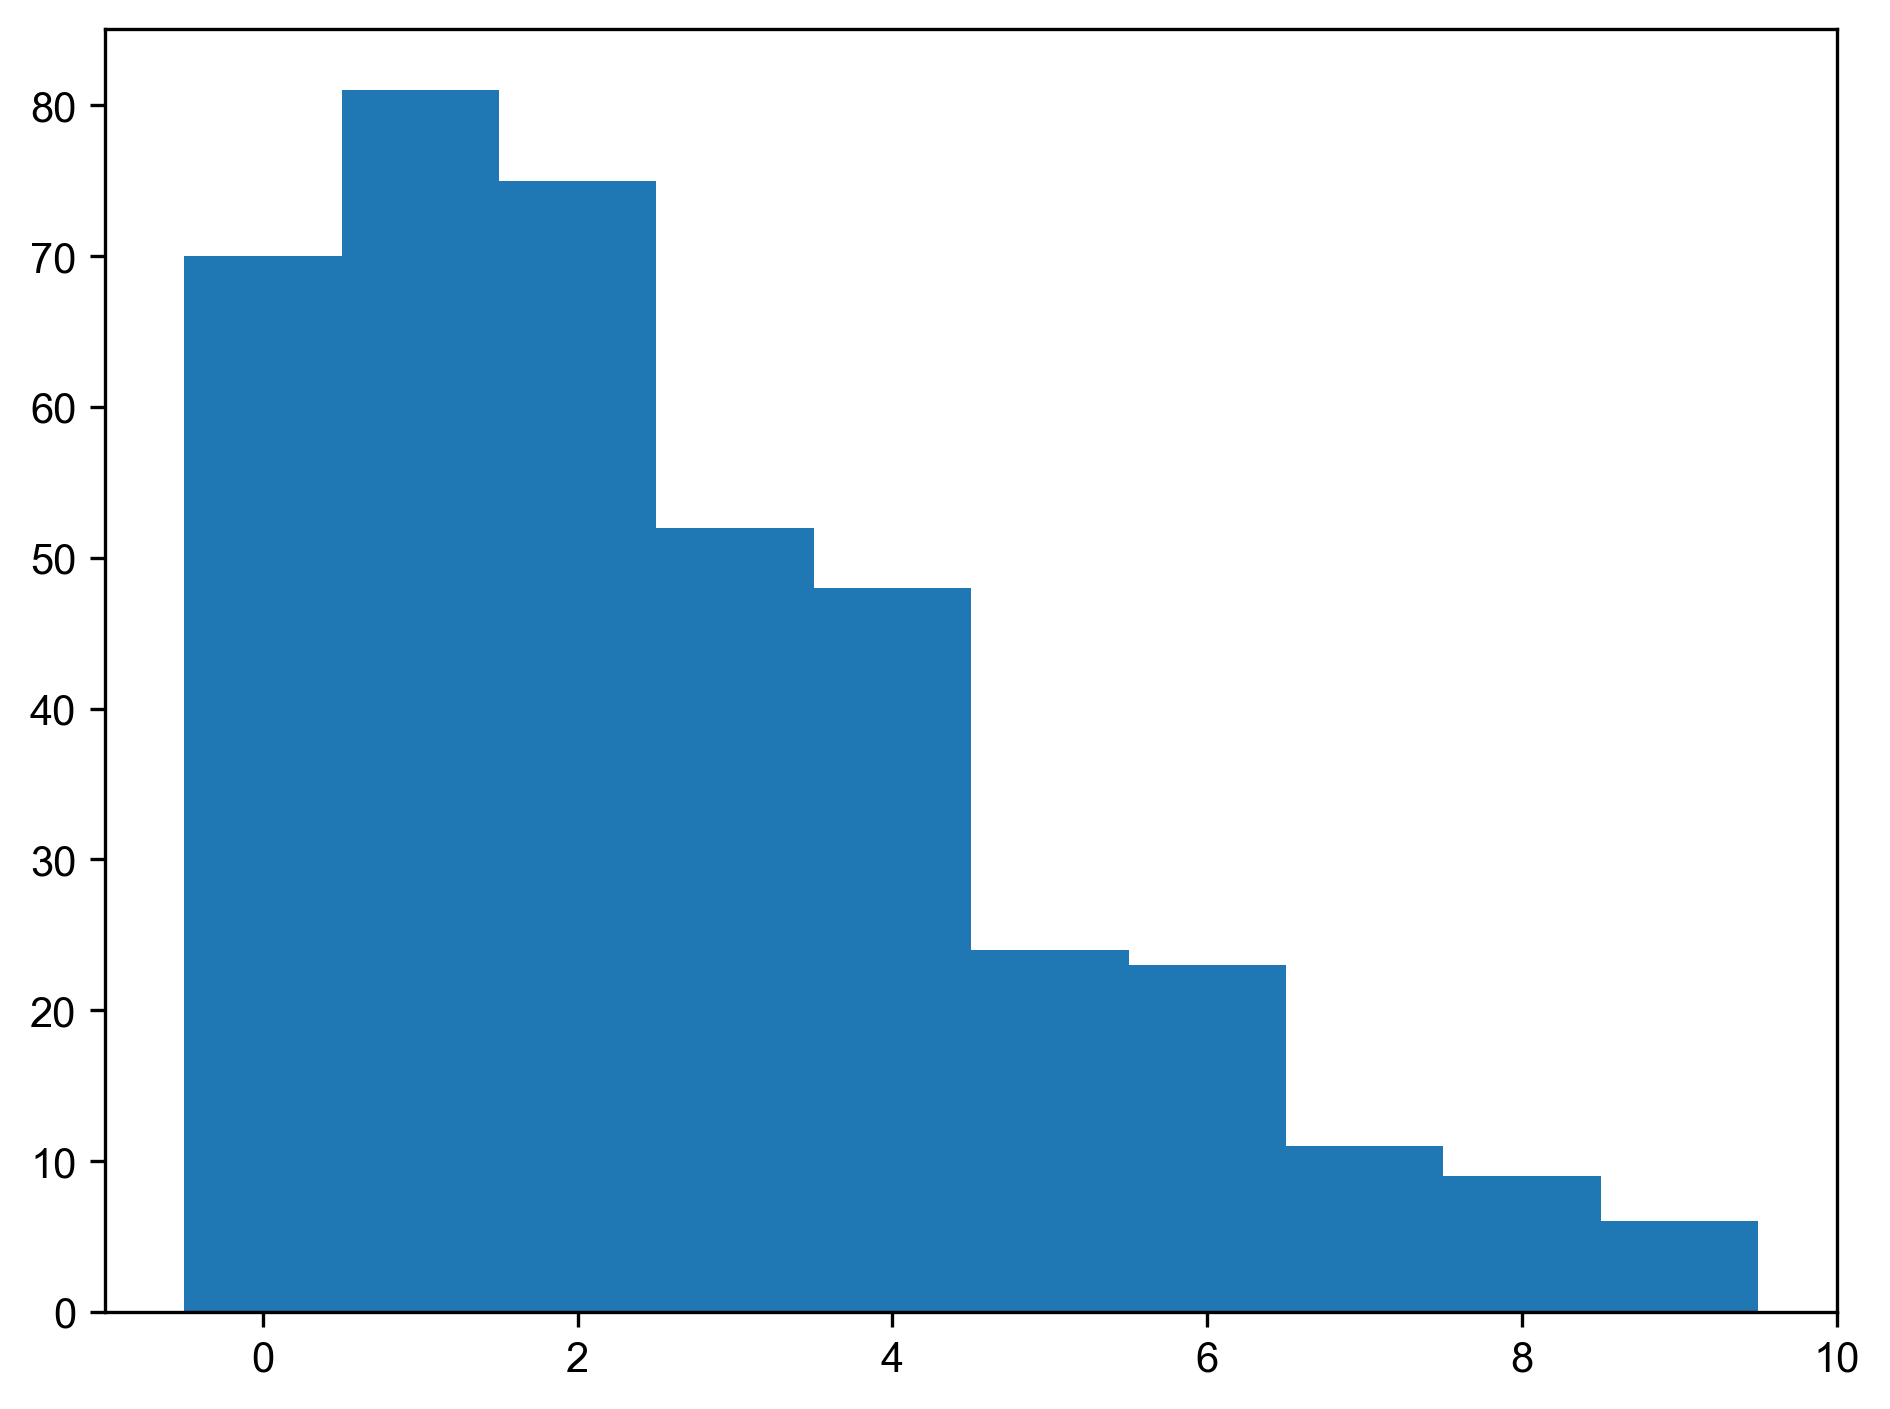

In [25]:
bin_repo_count = [len(k) for k in bin_count]
X = np.arange(len(bin_repo_count))
print(bin_repo_count)
figs, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
plt.bar(X, bin_repo_count, width=1.0)

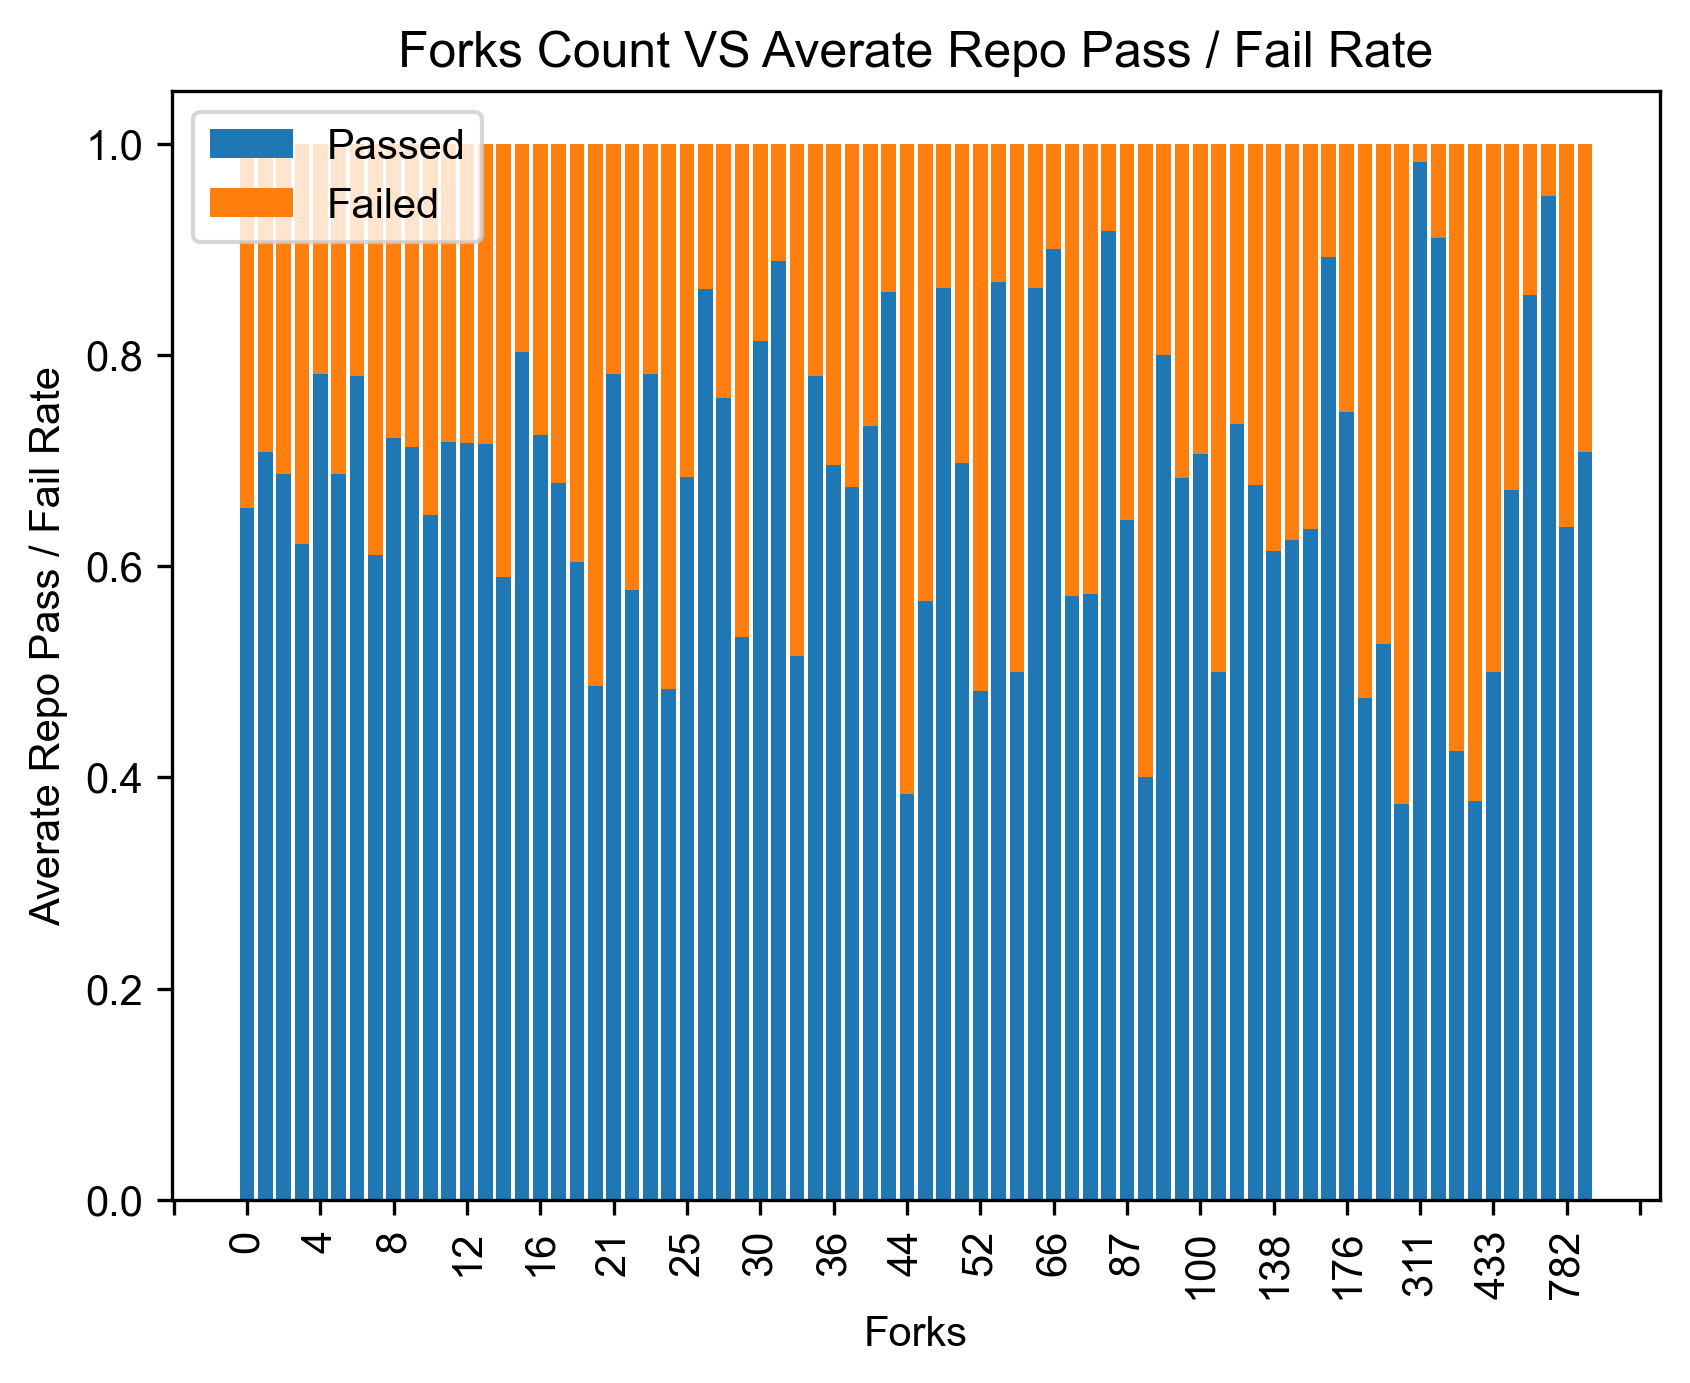

In [26]:
repo_stars = {}
with open(METRICS_FILE, 'r') as f:
    f.readline()
    rows = f.readlines()
    for item in rows:
        column = item.split(',')
        if column[0] in repo_names:
            repo_stars[column[2]] = repo_stars.get(column[2], []) + [column[0]]

stars_passed_rate = {}
for star_count in repo_stars:
    repo_list = repo_stars.get(star_count, [])
    rates = []
    for row in repo_results:
        columns = row.split(',')
        repo_name = columns[0]
        if repo_name in repo_list:
            passed_count = len(columns[3].split(';'))
            failed_count = len(columns[4].split(';'))
            if passed_count + failed_count > 0:
                rates.append(passed_count/(passed_count+failed_count))
    if len(rates) > 0:
        stars_passed_rate[star_count] = np.average(rates)
        

fig6, ax6 = plt.subplots()
        
x = sorted([int(k) for k in [*stars_passed_rate.keys()]], reverse=False)
xstr = [str(k) for k in x]
y1 = [1*stars_passed_rate[str(k)] for k in x]
y2 = [1-k for k in y1]
ax6.bar(xstr, y1)
ax6.bar(xstr, y2, bottom=y1)
ax6.set(xlabel="Forks", ylabel="Averate Repo Pass / Fail Rate", title="Forks Count VS Averate Repo Pass / Fail Rate")
ax6.legend(["Passed", "Failed"])
ax6.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(rotation=90)
plt.show()

In [27]:
data = np.array([int(k) for k in [*repo_stars.keys()]])
print(data)
bins = [0, 1, 3, 5, 10, 20,35, 50, 100, 300, 2200]
digitized = np.digitize(data, bins)
print(digitized)

[ 918  379  389 2186  259  156  433 1207  795  195  590  138  341  311
  179   87  243   85   78  782  560   63   57   89  166  129   48   32
  176   49  210   42   98   90   41  476    8   52    4   66   95    7
   44   16   40  106   34   22   11  140   24    9   18   28    0   15
   21  102   46   29   53   20   79    3    2   26   30   23    6   12
   19  100   10   13   36    5   14   25   31    1  196]
[10 10 10 10  9  9 10 10 10  9 10  9 10 10  9  8  9  8  8 10 10  8  8  8
  9  9  7  6  9  7  9  7  8  8  7 10  4  8  3  8  8  4  7  5  7  9  6  6
  5  9  6  4  5  6  1  5  6  9  7  6  8  6  8  3  2  6  6  6  4  5  5  9
  5  5  7  4  5  6  6  2  9]


{0: 0.6554004344629757, 1: 0.708572781328842, 2: 0.620621945924524, 3: 0.6871115728318149, 4: 0.5899446958270488, 5: 0.8888888888888888, 6: 0.6954022988505747, 7: 0.5738575982996812, 8: 0.47471451876019577, 9: 0.672566371681416}


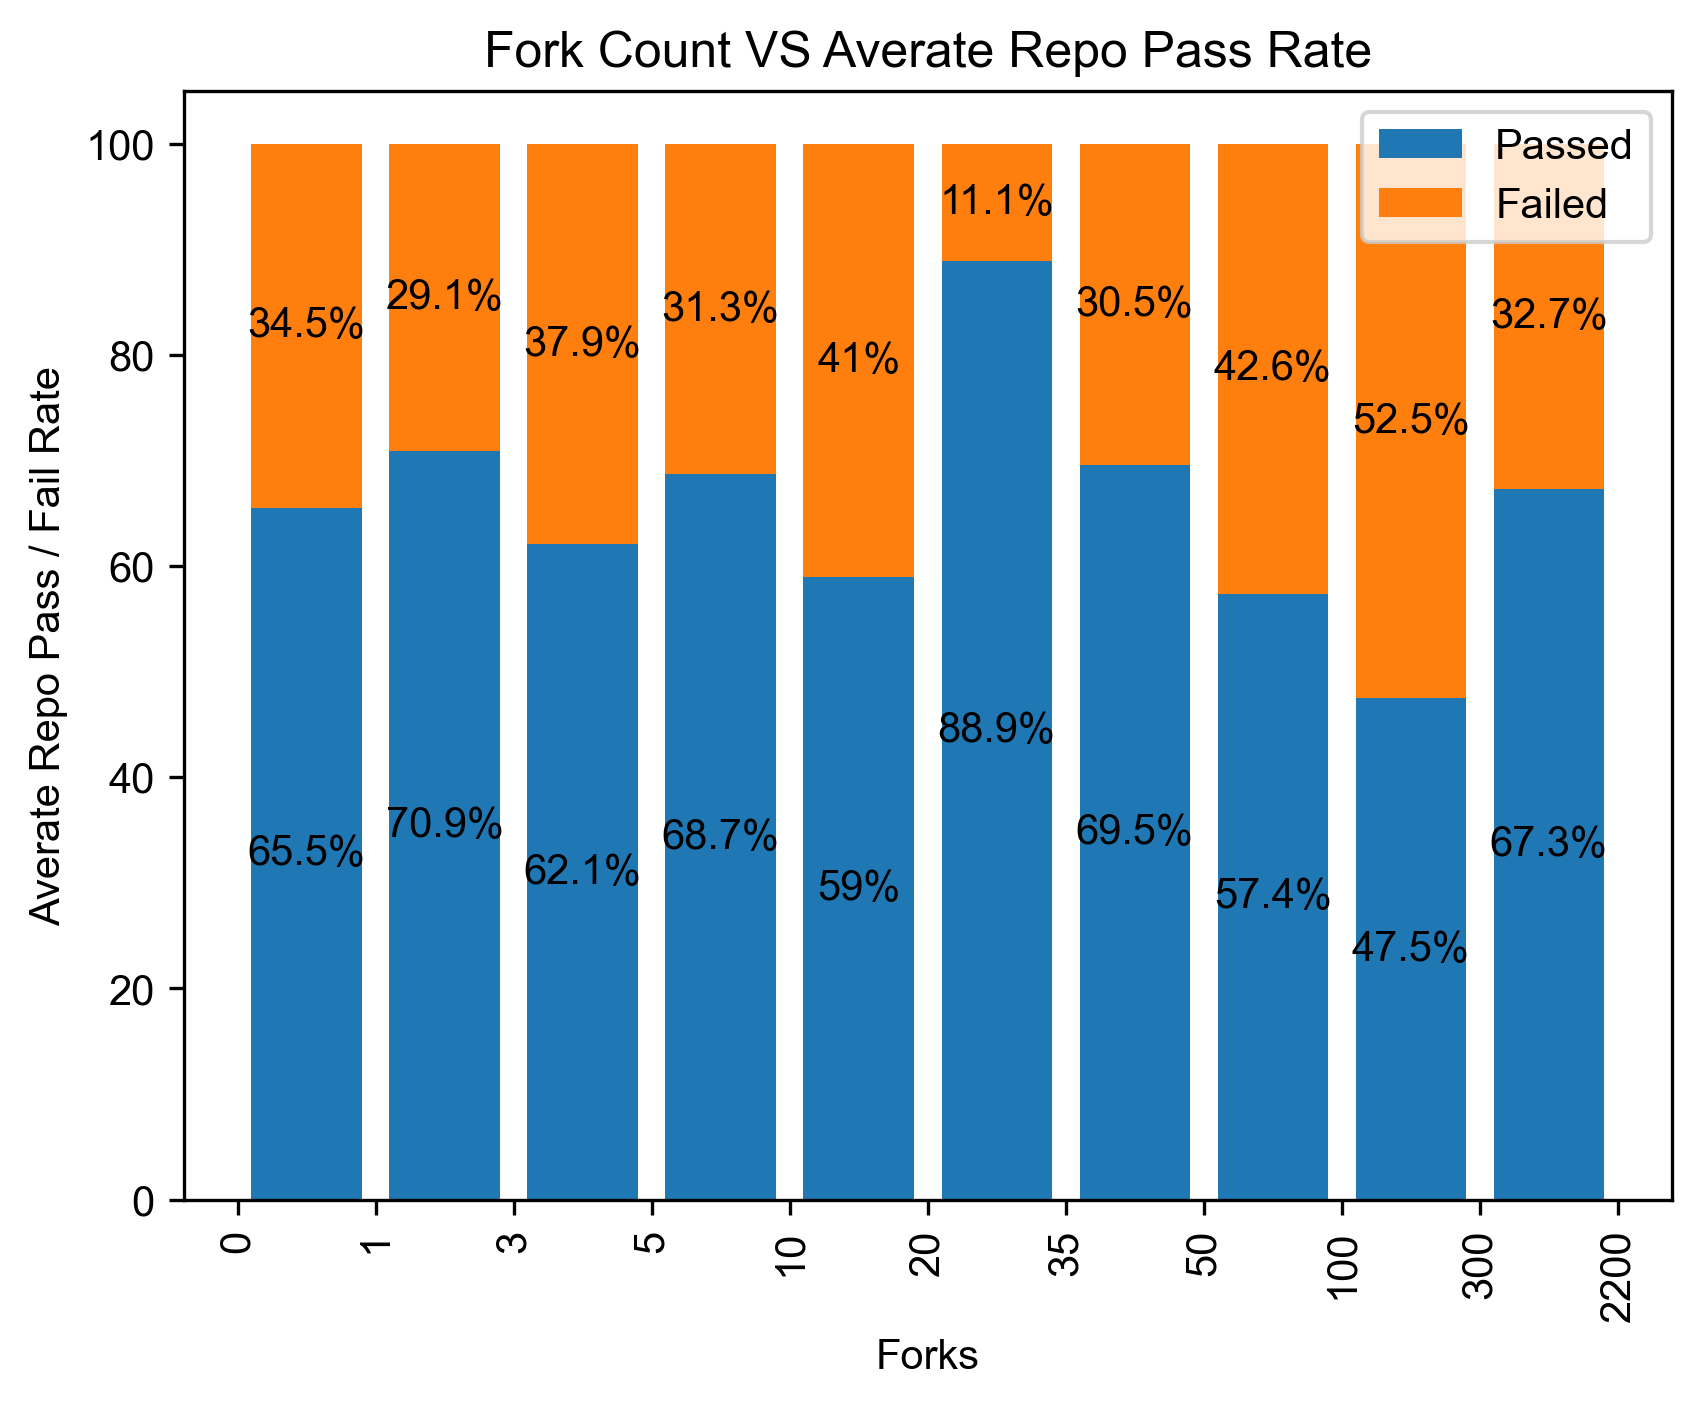

In [28]:
stars_passed_rate = {}
for i in range(len(bins)-1):
    low = bins[i]
    high = bins[i+1]
    for star_count in repo_stars:
        if int(star_count) < low or int(star_count) >= high:
            continue
        repo_list = repo_stars.get(star_count, [])
        rates = []
        for row in repo_results:
            columns = row.split(',')
            repo_name = columns[0]
            if repo_name in repo_list:
                passed_count = len(columns[3].split(';'))
                failed_count = len(columns[4].split(';'))
                if passed_count + failed_count > 0:
                    rates.append(passed_count/(passed_count+failed_count))
        if len(rates) > 0:
            stars_passed_rate[i] = np.average(rates)
print(stars_passed_rate)

fig6, ax6 = plt.subplots()
        
x = [*stars_passed_rate.keys()]
y1 = [100*stars_passed_rate[k] for k in x]
y2 = [100-k for k in y1]
bc1 = ax6.bar(x, y1)
bc2 = ax6.bar(x, y2, bottom=y1)
ax6.bar_label(bc1, labels=['{0:.3g}%'.format(e) for e in y1], label_type='center')
ax6.bar_label(bc2, labels=['{0:.3g}%'.format(e) for e in y2], label_type='center')
ax6.set(xlabel="Forks", ylabel="Averate Repo Pass / Fail Rate", title="Fork Count VS Averate Repo Pass Rate")
ax6.legend(["Passed", "Failed"])
ax6.set_xticks(np.arange(-0.5,len(bins)-0.5), bins)
#ax6.xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(rotation=90)
plt.show()

In [29]:
ycor = np.array([*stars_passed_rate.values()])
xcor = np.array([(bins[i+1]+bins[i])/2 for i in range(0, len(bins)-1)]).reshape((-1,1))

model = LinearRegression().fit(xcor, ycor)
r_sq = model.score(xcor, ycor)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
ypred = model.predict(xcor)
print(ypred)
correlation, p_value = spearmanr(ycor, xcor)

print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")
res = shapiro(ycor)
print(f"Shapiro test: {res.pvalue}")

coefficient of determination: 0.0017145010473804678
intercept: 0.6585855359789675
coefficients: [-1.15605006e-05]
[0.65857976 0.65856241 0.65853929 0.65849883 0.65841213 0.65826762
 0.65809421 0.6577185  0.65627344 0.64413491]
Spearman correlation: -0.28484848484848485
P-value: 0.42503815489214547
Shapiro test: 0.5011250972747803


In [30]:
stars = []
with open(METRICS_FILE, 'r') as f:
    f.readline()
    rows = f.readlines()
    for item in rows:
        column = item.split(',')
        if column[0] in repo_names:
            stars.append(int(column[2]))
print(stars)

[918, 379, 389, 2186, 259, 156, 433, 1207, 795, 195, 590, 138, 341, 311, 179, 87, 243, 87, 85, 78, 782, 560, 63, 57, 89, 166, 129, 48, 32, 176, 176, 49, 210, 42, 98, 90, 41, 476, 8, 52, 4, 66, 95, 7, 44, 16, 40, 106, 34, 22, 11, 95, 140, 49, 16, 129, 24, 9, 18, 28, 0, 15, 49, 21, 15, 21, 102, 11, 46, 9, 29, 53, 11, 4, 7, 29, 20, 18, 79, 3, 2, 40, 7, 26, 41, 30, 23, 46, 16, 8, 6, 63, 3, 12, 23, 11, 24, 23, 24, 19, 100, 10, 13, 2, 36, 18, 34, 16, 5, 0, 40, 24, 13, 13, 15, 14, 25, 15, 12, 31, 0, 36, 3, 5, 11, 4, 11, 6, 6, 3, 16, 1, 9, 14, 40, 1, 2, 6, 18, 11, 19, 41, 14, 11, 5, 4, 1, 4, 4, 4, 4, 3, 13, 6, 9, 6, 1, 4, 4, 15, 10, 2, 5, 4, 7, 5, 4, 1, 196, 3, 6, 2, 3, 4, 6, 1, 4, 2, 11, 4, 9, 0, 6, 7, 4, 4, 9, 8, 4, 6, 0, 1, 1, 16, 5, 8, 6, 3, 5, 4, 2, 1, 0, 2, 2, 1, 9, 0, 6, 7, 6, 1, 1, 3, 4, 1, 10, 4, 0, 3, 0, 0, 2, 0, 6, 2, 0, 0, 2, 10, 1, 2, 0, 0, 2, 2, 4, 4, 18, 4, 5, 0, 4, 1, 7, 2, 2, 2, 7, 0, 3, 1, 7, 0, 2, 1, 0, 5, 0, 0, 3, 0, 1, 2, 3, 1, 1, 0, 6, 1, 0, 4, 3, 2, 0, 2, 0, 2, 4, 0, 0, 

In [31]:
bin_count = [[] for k in range(len(bins)-1)]
for i in range(len(bins)-1):
    print("Bin {}".format(i+1))
    low = bins[i]
    high = bins[i+1]
    print("{} <= X < {}".format(low, high))
    for star in stars:
        if low <= star and star < high:
            bin_count[i] = bin_count[i] + [star]
    print("Count {}".format(len(bin_count[i])))
    print("Std {}".format(np.std(bin_count[i])))

Bin 1
0 <= X < 1
Count 79
Std 0.0
Bin 2
1 <= X < 3
Count 84
Std 0.5
Bin 3
3 <= X < 5
Count 57
Std 0.49372797471825575
Bin 4
5 <= X < 10
Count 51
Std 1.3310245292923246
Bin 5
10 <= X < 20
Count 43
Std 2.789728513884284
Bin 6
20 <= X < 35
Count 22
Std 4.299961560466279
Bin 7
35 <= X < 50
Count 17
Std 4.190118545531323
Bin 8
50 <= X < 100
Count 17
Std 15.027541037021898
Bin 9
100 <= X < 300
Count 17
Std 45.33893886233587
Bin 10
300 <= X < 2200
Count 13
Std 492.72891835394495


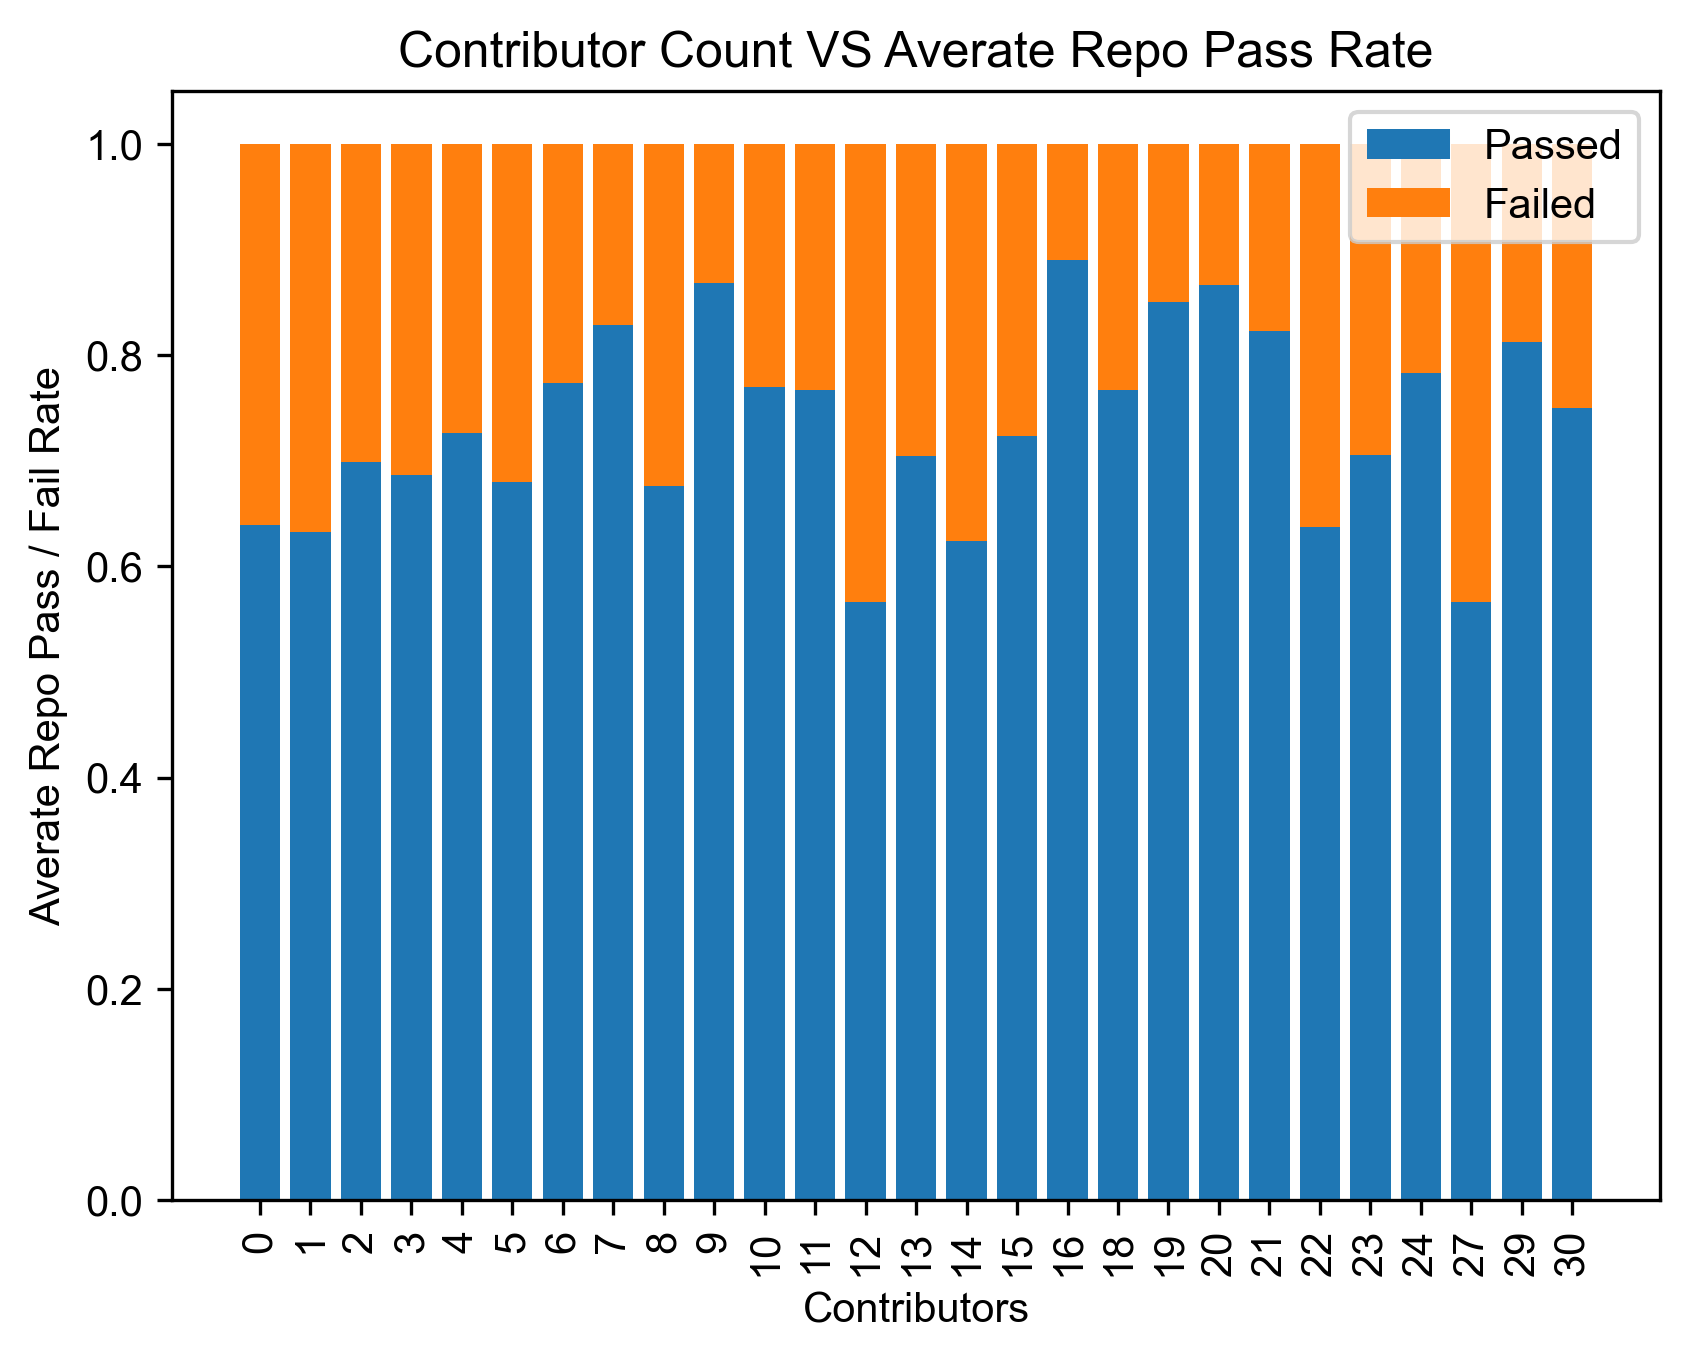

In [32]:
repo_stars = {}
with open(METRICS_FILE, 'r') as f:
    f.readline()
    rows = f.readlines()
    for item in rows:
        column = item.split(',')
        if column[0] in repo_names:
            repo_stars[column[3][:-1]] = repo_stars.get(column[3][:-1], []) + [column[0]]

stars_passed_rate = {}
for star_count in repo_stars:
    repo_list = repo_stars.get(star_count, [])
    rates = []
    for row in repo_results:
        columns = row.split(',')
        repo_name = columns[0]
        if repo_name in repo_list:
            passed_count = len(columns[3].split(';'))
            failed_count = len(columns[4].split(';'))
            if passed_count + failed_count > 0:
                rates.append(passed_count/(passed_count+failed_count))
    if len(rates) > 0:
        stars_passed_rate[star_count] = np.average(rates)
        

fig6, ax6 = plt.subplots()
        
x = sorted([int(k) for k in [*stars_passed_rate.keys()]], reverse=False)
xstr = [str(k) for k in x]
y1 = [1*stars_passed_rate[str(k)] for k in x]
y2 = [1-k for k in y1]
ax6.bar(xstr, y1)
ax6.bar(xstr, y2, bottom=y1)
ax6.set(xlabel="Contributors", ylabel="Averate Repo Pass / Fail Rate", title="Contributor Count VS Averate Repo Pass Rate")
ax6.legend(["Passed", "Failed"])
#ax6.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation=90)
plt.show()

In [33]:
ycor = np.array([*stars_passed_rate.values()])
xcor = np.array(x).reshape((-1,1))

model = LinearRegression().fit(xcor, ycor)
r_sq = model.score(xcor, ycor)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")
ypred = model.predict(xcor)
print(ypred)
correlation, p_value = spearmanr(ycor, xcor)

print(f"Spearman correlation: {correlation}")
print(f"P-value: {p_value}")
res = shapiro(xcor)
print(f"Shapiro test: {res.pvalue}")

coefficient of determination: 0.009334426903239823
intercept: 0.7204194335367274
coefficients: [0.00098824]
[0.72041943 0.72140767 0.72239591 0.72338415 0.72437238 0.72536062
 0.72634886 0.7273371  0.72832533 0.72931357 0.73030181 0.73129005
 0.73227828 0.73326652 0.73425476 0.735243   0.73623123 0.73820771
 0.73919595 0.74018418 0.74117242 0.74216066 0.7431489  0.74413713
 0.74710185 0.74907832 0.75006656]
Spearman correlation: 0.1452991452991453
P-value: 0.46960474559812493
Shapiro test: 0.4299587607383728


In [34]:
policies_rate = {}
for policy in policies:
    if passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0) > 100:
        policies_rate[policy] = passed_count_dict.get(policy, 0) / (passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0))

print("Averate Pass/Fail Rate: {}".format(np.average([*policies_rate.values()])))
        
sorted_policies_rates = sorted(policies_rate, key=policies_rate.get, reverse=True)
print("Best 5 Pass / Fail Rate Policies")
for policy in sorted_policies_rates[:6]:
    print("{} - {} - {}".format(policy, (passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0)), policies_rate[policy]))
print("Worst 5 Pass / Fail Rate Policies")
for policy in reversed(sorted_policies_rates[-7:]):
    print("{} - {} - {}".format(policy, (passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0)), policies_rate[policy]))

Averate Pass/Fail Rate: 0.6078537902655454
Best 5 Pass / Fail Rate Policies
CKV_AWS_60 - 1911 - 0.9994767137624281
CKV_AWS_61 - 1911 - 0.9994767137624281
CKV_AWS_46 - 660 - 0.9984848484848485
CKV_AWS_45 - 616 - 0.9983766233766234
CKV_AWS_227 - 243 - 0.9958847736625515
CKV_AWS_1 - 2172 - 0.9958563535911602
Worst 5 Pass / Fail Rate Policies
CKV2_AWS_12 - 440 - 0.006818181818181818
CKV_AWS_136 - 159 - 0.018867924528301886
CKV2_AWS_11 - 439 - 0.03416856492027335
CKV_AWS_79 - 963 - 0.04984423676012461
CKV_AWS_8 - 850 - 0.05058823529411765
CKV_AWS_119 - 161 - 0.055900621118012424
CKV_AWS_126 - 659 - 0.06069802731411229


In [35]:
resource_rate = {}
for policy in policies_rate:
    resource = "_".join(p_names[policy].split("_")[:2])
    resource_rate[resource] = resource_rate.get(resource, []) + [policies_rate[policy]]
for resource in resource_rate:
    resource_rate[resource] = np.average(resource_rate[resource])
sorted_resource_rate = sorted(resource_rate, key=resource_rate.get, reverse=True)
print("Best 5 Pass / Fail Rate Resources")
for resource in sorted_resource_rate[:6]:
    print("{} - {}".format(resource, resource_rate[resource]))
print("Worst 5 Pass / Fail Rate Resources")
for resource in reversed(sorted_resource_rate[-5:]):
    print("{} - {}".format(resource, resource_rate[resource]))

Best 5 Pass / Fail Rate Resources
aws - 0.9946902654867257
aws_kms - 0.9897119341563786
aws_ecs - 0.9863481228668942
aws_security - 0.9291105958695861
aws_iam - 0.9251618847751019
aws_subnet - 0.7366167023554604
Worst 5 Pass / Fail Rate Resources
aws_default - 0.006818181818181818
aws_ecr - 0.018867924528301886
aws_vpc - 0.03416856492027335
aws_dynamodb - 0.055900621118012424
aws_sns - 0.18518518518518517


In [36]:
policies_rate = {}
for policy in policies:
    if passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0) > 0:
        policies_rate[policy] = passed_count_dict.get(policy, 0) / (passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0))

categories_rates = {}
for category in categories_passed_counts:
    categories_rates[category] = categories_passed_counts[category] / (categories_passed_counts[category] + categories_failed_counts[category])

#categories_rates = {}
#for policy in policies_rate:
 #   categories_rates[categories[policy]] = categories_rates.get(categories[policy], []) + [policies_rate[policy]]
#for category in categories_rates:
 #   categories_rates[category] = np.average(categories_rates.get(category, []))
print(categories_rates)

{'Hard-coded secret': 0.9862418537291817, 'IP Address binding': 0.8822653924486918, 'Logging/Monitoring': 0.1536401266130996, 'Access policy': 0.8261059795819155, 'Encryption at rest': 0.25901639344262295, 'Encryption in transit': 0.6311188811188811, 'Outdated feature': 0.10287081339712918, 'Admin by default': 0.9886019770022191}


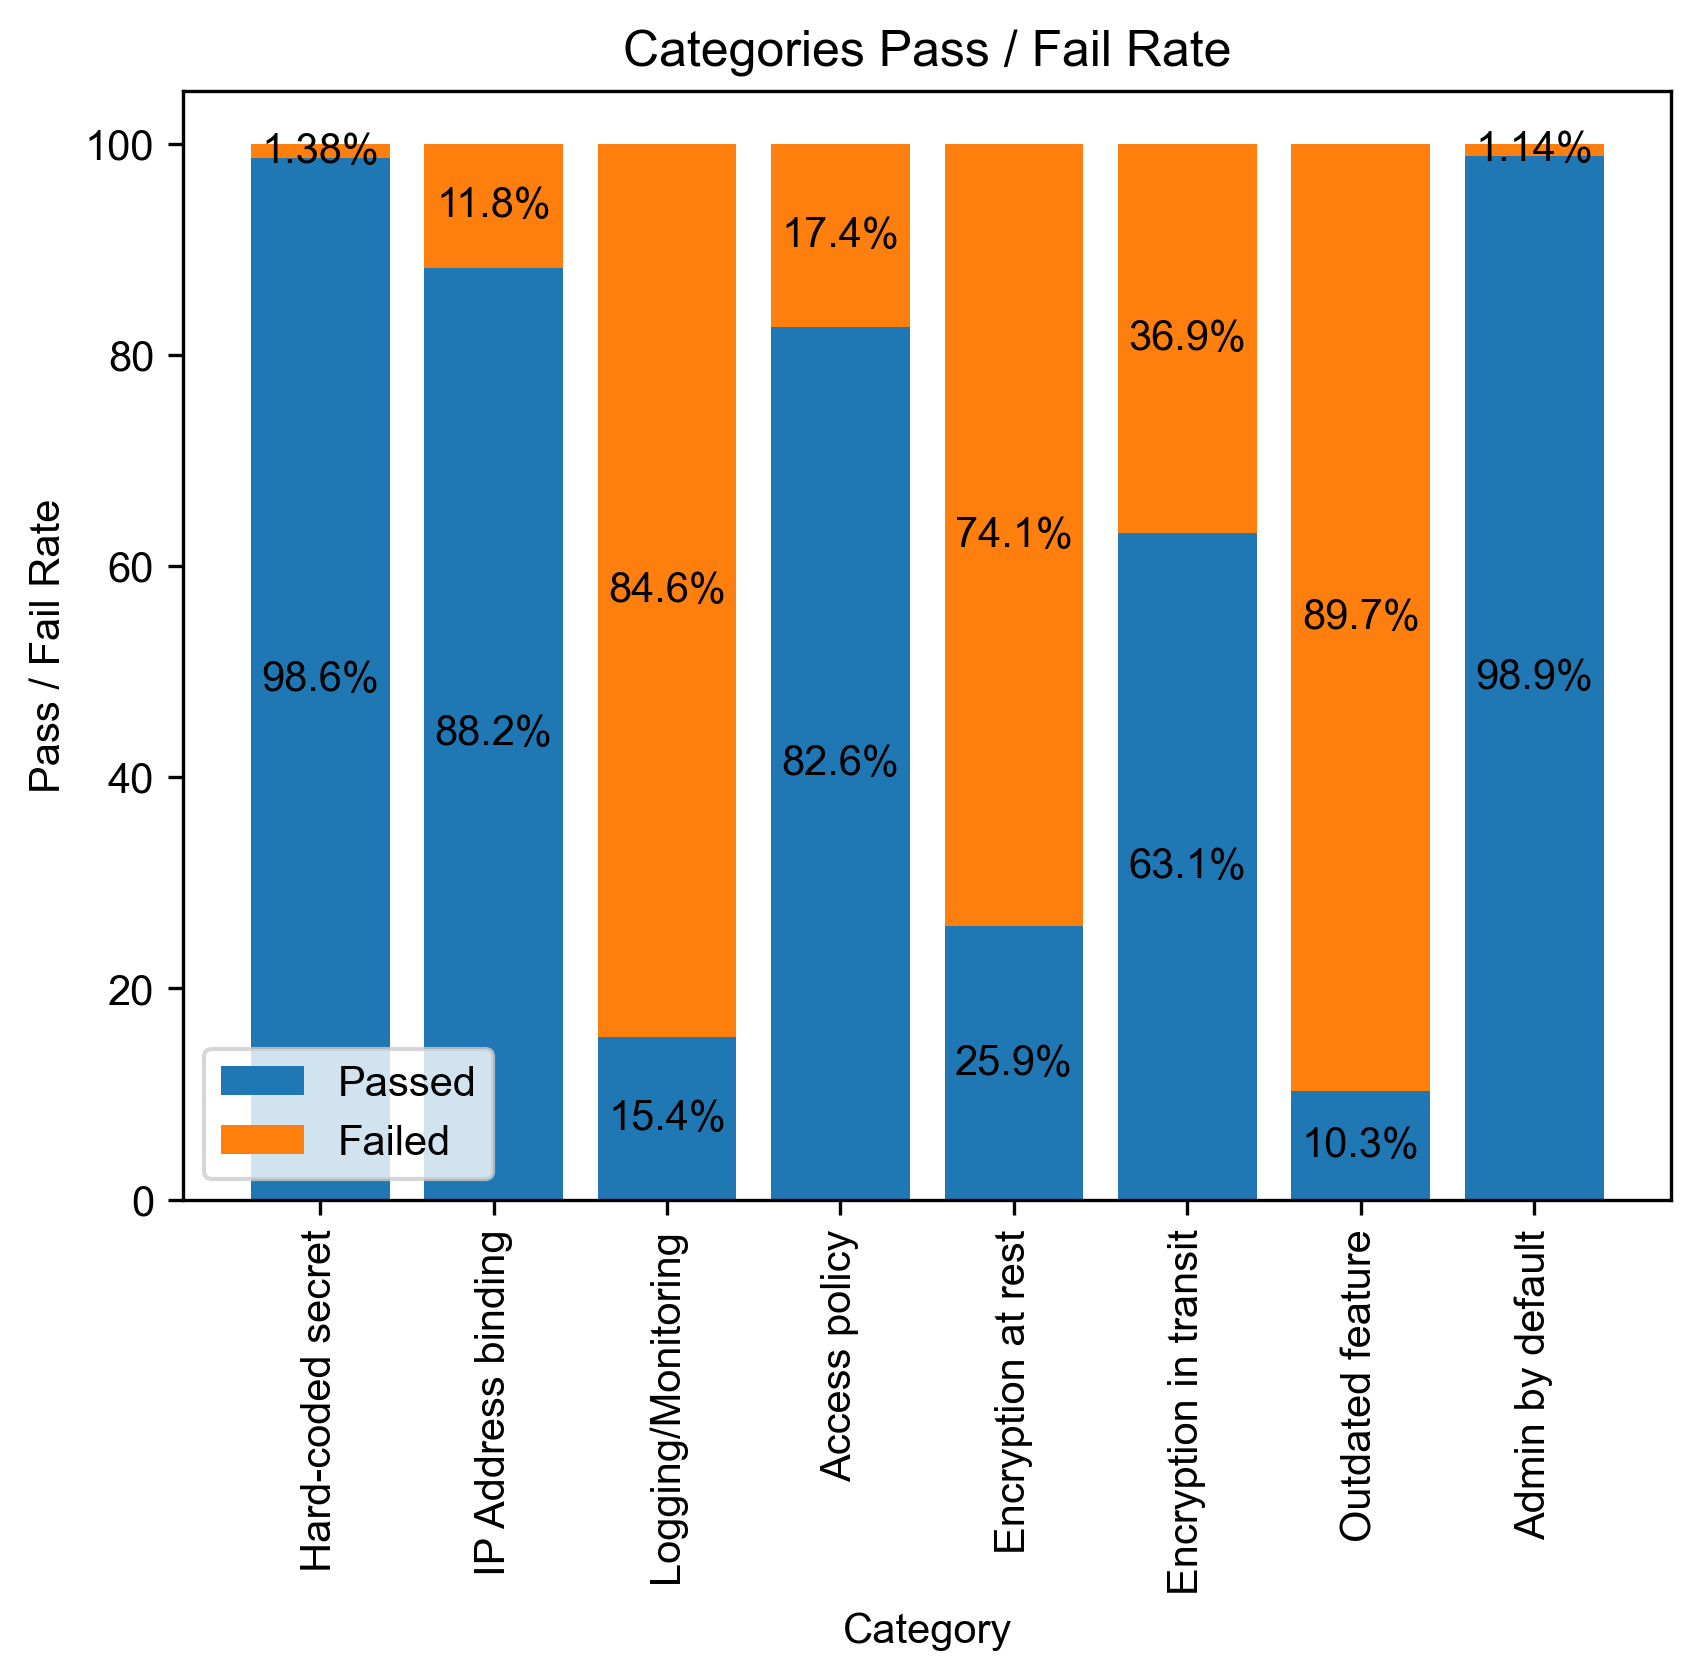

In [37]:
fig7, ax7 = plt.subplots()
x = [*categories_rates.keys()]
y1 = [100*categories_rates[k] for k in x]
y2 = [100-k for k in y1]
bc1 = ax7.bar(x, y1)
bc2 = ax7.bar(x, y2, bottom=y1)
ax7.bar_label(bc1, labels=['{0:.3g}%'.format(e) for e in y1], label_type='center')
ax7.bar_label(bc2, labels=['{0:.3g}%'.format(e) for e in y2], label_type='center')
ax7.set(xlabel="Category", ylabel="Pass / Fail Rate", title="Categories Pass / Fail Rate")
ax7.legend(["Passed", "Failed"])
plt.xticks(rotation=90)
plt.show()

In [38]:
policies_nb_runs = {}
for policy in policies:
    policies_nb_runs[policy] = passed_count_dict.get(policy, 0) + failed_count_dict.get(policy, 0)
mean_category_runs = {}
for policy in policies_nb_runs:
    mean_category_runs[categories.get(policy, "Uncategorized")] = mean_category_runs.get(categories.get(policy, "Uncategorized"), []) + [policies_nb_runs[policy]]

for category in mean_category_runs:
    mean_category_runs[category] = np.average(mean_category_runs[category])
print(mean_category_runs)

{'Admin by default': 1652.3333333333333, 'Encryption in transit': 114.4, 'Encryption at rest': 130.71428571428572, 'Access policy': 709.3103448275862, 'Logging/Monitoring': 256.6875, 'IP Address binding': 1063.8333333333333, 'Hard-coded secret': 1035.75, 'Outdated feature': 313.5}


In [39]:
stars = []
forks = []
contrib = []
with open(METRICS_FILE, 'r') as f:
    #f.readline()
    rows = f.readlines()
    for item in rows:
        column = item.split(',')
        if column[0] in repo_names:
            stars.append(int(column[1]))
            forks.append(int(column[2]))
            contrib.append(int(column[3].strip("\n")))

In [40]:
print("Average stars: {}".format(np.average(stars)))
print("Median stars: {}".format(np.median(stars)))
print("Average forks: {}".format(np.average(forks)))
print("Median forks: {}".format(np.median(forks)))
print("Average conrtib: {}".format(np.average(contrib)))
print("Median contrib: {}".format(np.median(contrib)))


Average stars: 174.76309226932668
Median stars: 7.0
Average forks: 43.25935162094763
Median forks: 4.0
Average conrtib: 7.598503740648379
Median contrib: 3.0
